<div>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/01/NN.png" 
   width="350" style="margin: 5px auto; display: block; position: relative; left: -20px;" />
</div>

<!--NAVIGATION-->
# [Implementation of various learning rate scheduler](learning_rate_scheduler.ipynb) | Implementation of various Optimizers(various_losses_v_iteration) 

## Submodule -1.5 : Training and Optimzation

Adam Optimization
Epoch: 01/500 Loss: 6.23648e+00
Epoch: 02/500 Loss: 6.06708e+00
Epoch: 03/500 Loss: 5.90236e+00
Epoch: 04/500 Loss: 5.74237e+00
Epoch: 05/500 Loss: 5.58713e+00
Epoch: 06/500 Loss: 5.43660e+00
Epoch: 07/500 Loss: 5.29071e+00
Epoch: 08/500 Loss: 5.14929e+00
Epoch: 09/500 Loss: 5.01213e+00
Epoch: 10/500 Loss: 4.87900e+00
Epoch: 11/500 Loss: 4.74966e+00
Epoch: 12/500 Loss: 4.62385e+00
Epoch: 13/500 Loss: 4.50134e+00
Epoch: 14/500 Loss: 4.38191e+00
Epoch: 15/500 Loss: 4.26534e+00
Epoch: 16/500 Loss: 4.15145e+00
Epoch: 17/500 Loss: 4.04007e+00
Epoch: 18/500 Loss: 3.93108e+00
Epoch: 19/500 Loss: 3.82437e+00
Epoch: 20/500 Loss: 3.71989e+00
Epoch: 21/500 Loss: 3.61762e+00
Epoch: 22/500 Loss: 3.51753e+00
Epoch: 23/500 Loss: 3.41965e+00
Epoch: 24/500 Loss: 3.32400e+00
Epoch: 25/500 Loss: 3.23061e+00
Epoch: 26/500 Loss: 3.13954e+00
Epoch: 27/500 Loss: 3.05080e+00
Epoch: 28/500 Loss: 2.96442e+00
Epoch: 29/500 Loss: 2.88041e+00
Epoch: 30/500 Loss: 2.79877e+00
Epoch: 31/500 Loss: 2.

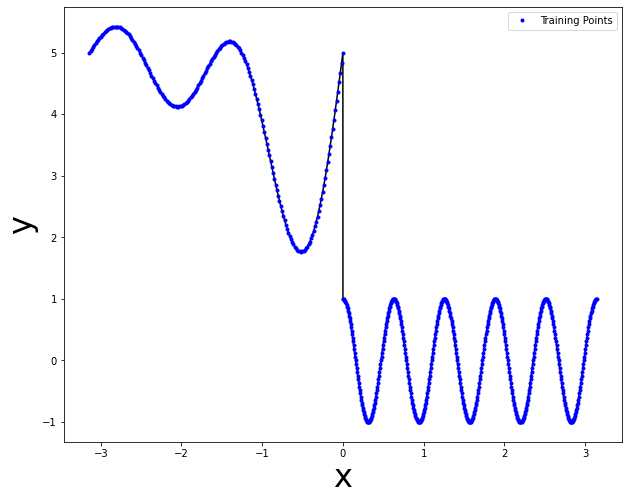

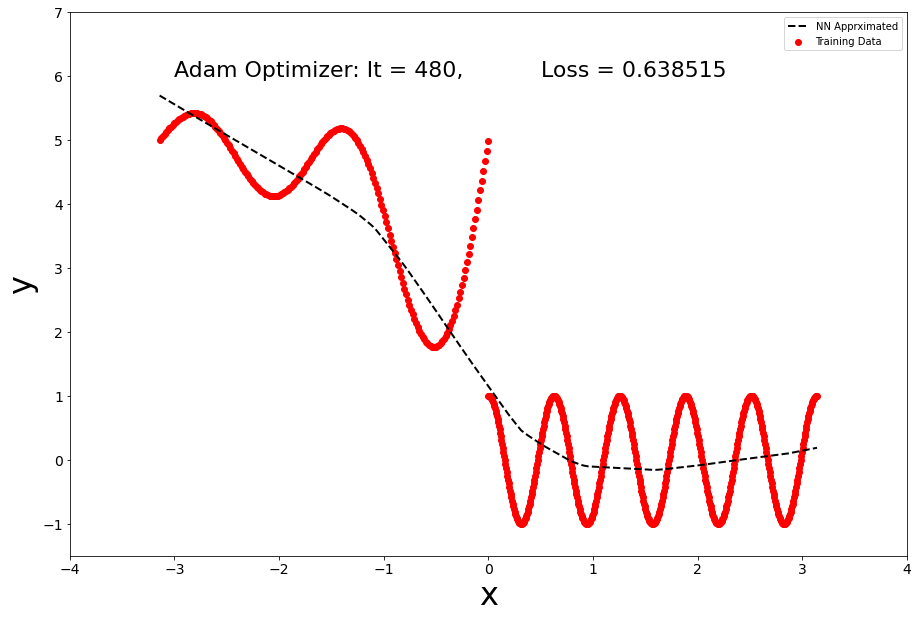

In [1]:
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam, RMSprop, SparseAdam
from torch.utils.data import Dataset, DataLoader


%matplotlib inline
torch.manual_seed(1234) 



def train_2d(trainer, steps=20, f_grad=None):
    """Optimize a 2D objective function with a customized trainer.
    Defined in :numref:`subsec_gd-learningrate`"""
    # `s1` and `s2` are internal state variables that will be used later
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results


def fun_x(x):
    if x < 0.:
        f = 5.0 + np.sin(x) + np.sin(2.*x) + np.sin(3.*x) + np.sin(4.*x)
    else:
        f = np.cos(10.*x)
    return f

fig, ax1 = plt.subplots(1, 1, figsize=(10,8))
x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
x_in_r = np.linspace(0., np.pi, 501)
y_in_l = np.array([fun_x(i) for i in x_in_l])
y_in_r = np.array([fun_x(i) for i in x_in_r])
x_in = np.concatenate((x_in_l, x_in_r), axis=0)
y_in = np.array([fun_x(i) for i in x_in])
ax1.plot(x_in, y_in, 'k-')
ax1.plot(x_in, y_in, '.b', label="Training Points")
ax1.set_xlabel('x', fontsize=32)
ax1.set_ylabel('y', fontsize=32)
ax1.legend()




x = torch.from_numpy(x_in.reshape(-1,1)).float()
y = torch.from_numpy(y_in.reshape(-1,1)).float()




loss_function = torch.nn.MSELoss()
Niter_Adam = 500

Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.ReLU(),
      torch.nn.Linear(100, 1))

optimizer_adam = torch.optim.Adam(Net.parameters(), lr = 0.001)
optimizer_lbfgs = LBFGS(Net.parameters(), history_size=5, max_iter=6)


fig, ax = plt.subplots(figsize=(15,10))
image_list = []
adam_only_loss = []
lbfgs_loss = []

x = Variable(x)
y = Variable(y)

# Implementation of Adam
print('Adam Optimization')
    
for it in range(Niter_Adam):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  # Notice the order: NN Pred first and then actual value
    optimizer_adam.zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer_adam.step()    
    #optimizer.step(closure)
    #loss = closure()
    adam_only_loss.append(loss)
    print(f"Epoch: {it + 1:02}/{Niter_Adam} Loss: {loss:.5e}")
    y_pred = Net(x)
    y_test = y_pred.detach().numpy()
    if it%20==0:
        plt.cla()
        ax.set_xlabel('x', fontsize=32)
        ax.set_ylabel('y', fontsize=32)
        ax.set_xlim(-4, 4)
        ax.set_ylim(-1.5, 7.0)
        ax.scatter(x_in, y_in, color = "red", label="Training Data")
        ax.plot(x_in, y_test, 'k--', lw=2,  label="NN Apprximated")
        ax.text(-3, 6.0, 'Adam Optimizer: It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
        ax.text(0.5, 6.0, 'Loss = %.6f' % loss,
                fontdict={'size': 22, 'color':  'black'})
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.legend()

        fig.canvas.draw()      
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        image_list.append(image)

imageio.mimsave('./Adam_func.gif', image_list, fps=5)
ep_adam = np.arange(500)+1




In [2]:
# For implementation of NAdam
# Source: https://github.com/rwightman/pytorch-image-models/blob/master/timm/optim/nadam.py
import math

import torch
from torch.optim.optimizer import Optimizer

class Nadam(Optimizer):
    """Implements Nadam algorithm (a variant of Adam based on Nesterov momentum).
    It has been proposed in `Incorporating Nesterov Momentum into Adam`__.
    Arguments:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float, optional): learning rate (default: 2e-3)
        betas (Tuple[float, float], optional): coefficients used for computing
            running averages of gradient and its square
        eps (float, optional): term added to the denominator to improve
            numerical stability (default: 1e-8)
        weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
        schedule_decay (float, optional): momentum schedule decay (default: 4e-3)
    __ http://cs229.stanford.edu/proj2015/054_report.pdf
    __ http://www.cs.toronto.edu/~fritz/absps/momentum.pdf
        Originally taken from: https://github.com/pytorch/pytorch/pull/1408
        NOTE: Has potential issues but does work well on some problems.
    """

    def __init__(self, params, lr=2e-3, betas=(0.9, 0.999), eps=1e-8,
                 weight_decay=0, schedule_decay=4e-3):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        defaults = dict(
            lr=lr, betas=betas, eps=eps, weight_decay=weight_decay, schedule_decay=schedule_decay)
        super(Nadam, self).__init__(params, defaults)

    @torch.no_grad()
    def step(self, closure=None):
        """Performs a single optimization step.
        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad
                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    state['m_schedule'] = 1.
                    state['exp_avg'] = torch.zeros_like(p)
                    state['exp_avg_sq'] = torch.zeros_like(p)

                # Warming momentum schedule
                m_schedule = state['m_schedule']
                schedule_decay = group['schedule_decay']
                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']
                eps = group['eps']
                state['step'] += 1
                t = state['step']
                bias_correction2 = 1 - beta2 ** t

                if group['weight_decay'] != 0:
                    grad = grad.add(p, alpha=group['weight_decay'])

                momentum_cache_t = beta1 * (1. - 0.5 * (0.96 ** (t * schedule_decay)))
                momentum_cache_t_1 = beta1 * (1. - 0.5 * (0.96 ** ((t + 1) * schedule_decay)))
                m_schedule_new = m_schedule * momentum_cache_t
                m_schedule_next = m_schedule * momentum_cache_t * momentum_cache_t_1
                state['m_schedule'] = m_schedule_new

                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(grad, alpha=1. - beta1)
                exp_avg_sq.mul_(beta2).addcmul_(grad, grad, value=1. - beta2)

                denom = (exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(eps)
                p.addcdiv_(grad, denom, value=-group['lr'] * (1. - momentum_cache_t) / (1. - m_schedule_new))
                p.addcdiv_(exp_avg, denom, value=-group['lr'] * momentum_cache_t_1 / (1. - m_schedule_next))

        return loss


Nadam Optimization


AttributeError: module 'torch.optim' has no attribute 'NAdam'

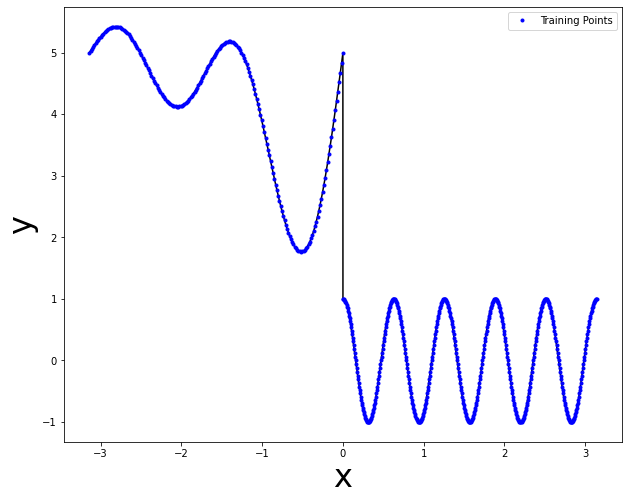

In [4]:
# Implementation of NAdam
print('Nadam Optimization')

import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam, RMSprop, SparseAdam
from torch.utils.data import Dataset, DataLoader


%matplotlib inline
torch.manual_seed(1234) 


def fun_x(x):
    if x < 0.:
        f = 5.0 + np.sin(x) + np.sin(2.*x) + np.sin(3.*x) + np.sin(4.*x)
    else:
        f = np.cos(10.*x)
    return f

fig, ax1 = plt.subplots(1, 1, figsize=(10,8))
x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
x_in_r = np.linspace(0., np.pi, 501)
y_in_l = np.array([fun_x(i) for i in x_in_l])
y_in_r = np.array([fun_x(i) for i in x_in_r])
x_in = np.concatenate((x_in_l, x_in_r), axis=0)
y_in = np.array([fun_x(i) for i in x_in])
ax1.plot(x_in, y_in, 'k-')
ax1.plot(x_in, y_in, '.b', label="Training Points")
ax1.set_xlabel('x', fontsize=32)
ax1.set_ylabel('y', fontsize=32)
ax1.legend()

x = torch.from_numpy(x_in.reshape(-1,1)).float()
y = torch.from_numpy(y_in.reshape(-1,1)).float()




loss_function = torch.nn.MSELoss()
Niter_Nadam = 500

Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.ReLU(),
      torch.nn.Linear(100, 1))

optimizer_nadam = torch.optim.NAdam(Net.parameters(), lr=0.001)

fig_1, ax_1 = plt.subplots(figsize=(15,10))
image_list1 = []
Nadam_loss = []

x = Variable(x)
y = Variable(y)


    




for it in range(Niter_Nadam):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  # Notice the order: NN Pred first and then actual value
    optimizer_nadam.zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer_nadam.step()    
    Nadam_loss.append(loss)
    print(f"Epoch: {it + 1:02}/{Niter_Nadam} Loss: {loss:.5e}")
    y_pred = Net(x)
    y_test = y_pred.detach().numpy()
    if it%20==0:
        plt.cla()
        ax_1.set_xlabel('x', fontsize=32)
        ax_1.set_ylabel('y', fontsize=32)
        ax_1.set_xlim(-4, 4)
        ax_1.set_ylim(-1.5, 7.0)
        ax_1.scatter(x_in, y_in, color = "red", label="Training Data")
        ax_1.plot(x_in, y_test, 'k--', lw=2,  label="NN Apprximated")
        ax_1.text(-3, 6.0, 'NAdam Optimizer: It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
        ax_1.text(0.5, 6.0, 'Loss = %.6f' % loss,
                fontdict={'size': 22, 'color':  'black'})
        ax_1.tick_params(axis='x', labelsize=14)
        ax_1.tick_params(axis='y', labelsize=14)
        ax_1.legend()

        fig_1.canvas.draw()      
        image1 = np.frombuffer(fig_1.canvas.tostring_rgb(), dtype='uint8')
        image1  = image1.reshape(fig_1.canvas.get_width_height()[::-1] + (3,))

        image_list1.append(image1)

imageio.mimsave('./NAdam_func.gif', image_list1, fps=5)
ep_nadam = np.arange(500)+1



RMS Optimization
Epoch: 01/500 Loss: 6.23648e+00
Epoch: 02/500 Loss: 4.74661e+00
Epoch: 03/500 Loss: 3.95394e+00
Epoch: 04/500 Loss: 3.39932e+00
Epoch: 05/500 Loss: 2.97771e+00
Epoch: 06/500 Loss: 2.64297e+00
Epoch: 07/500 Loss: 2.37019e+00
Epoch: 08/500 Loss: 2.14409e+00
Epoch: 09/500 Loss: 1.95451e+00
Epoch: 10/500 Loss: 1.79425e+00
Epoch: 11/500 Loss: 1.65795e+00
Epoch: 12/500 Loss: 1.54156e+00
Epoch: 13/500 Loss: 1.44185e+00
Epoch: 14/500 Loss: 1.35623e+00
Epoch: 15/500 Loss: 1.28259e+00
Epoch: 16/500 Loss: 1.21917e+00
Epoch: 17/500 Loss: 1.16450e+00
Epoch: 18/500 Loss: 1.11733e+00
Epoch: 19/500 Loss: 1.07660e+00
Epoch: 20/500 Loss: 1.04142e+00
Epoch: 21/500 Loss: 1.01099e+00
Epoch: 22/500 Loss: 9.84657e-01
Epoch: 23/500 Loss: 9.61830e-01
Epoch: 24/500 Loss: 9.42015e-01
Epoch: 25/500 Loss: 9.24779e-01
Epoch: 26/500 Loss: 9.09749e-01
Epoch: 27/500 Loss: 8.96608e-01
Epoch: 28/500 Loss: 8.85082e-01
Epoch: 29/500 Loss: 8.74927e-01
Epoch: 30/500 Loss: 8.65946e-01
Epoch: 31/500 Loss: 8.5

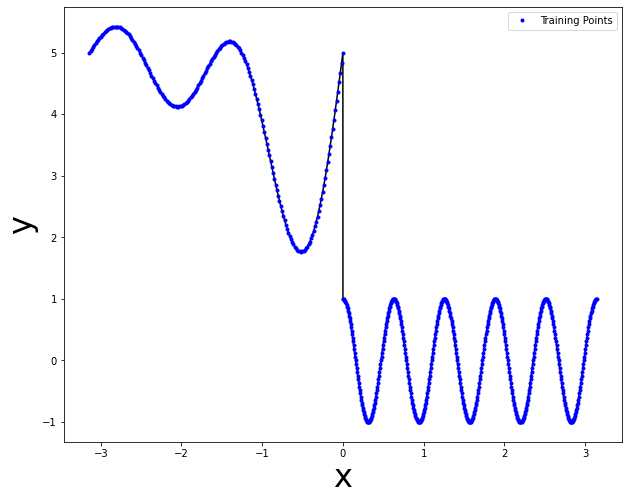

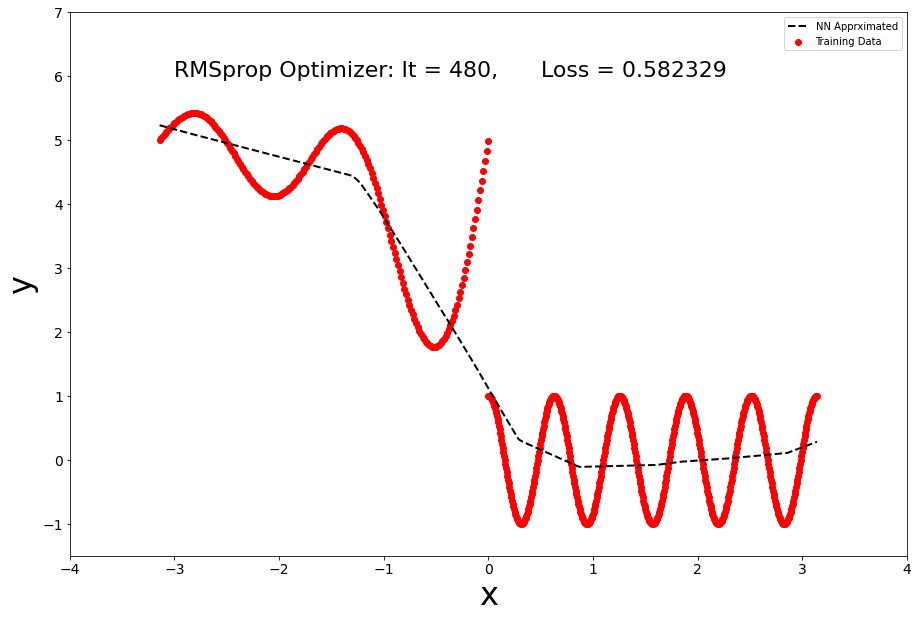

In [4]:
# Implementation of RMSprop
print('RMS Optimization')

import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam, RMSprop, SparseAdam
from torch.utils.data import Dataset, DataLoader


%matplotlib inline
torch.manual_seed(1234) 


def fun_x(x):
    if x < 0.:
        f = 5.0 + np.sin(x) + np.sin(2.*x) + np.sin(3.*x) + np.sin(4.*x)
    else:
        f = np.cos(10.*x)
    return f

fig, ax1 = plt.subplots(1, 1, figsize=(10,8))
x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
x_in_r = np.linspace(0., np.pi, 501)
y_in_l = np.array([fun_x(i) for i in x_in_l])
y_in_r = np.array([fun_x(i) for i in x_in_r])
x_in = np.concatenate((x_in_l, x_in_r), axis=0)
y_in = np.array([fun_x(i) for i in x_in])
ax1.plot(x_in, y_in, 'k-')
ax1.plot(x_in, y_in, '.b', label="Training Points")
ax1.set_xlabel('x', fontsize=32)
ax1.set_ylabel('y', fontsize=32)
ax1.legend()

x = torch.from_numpy(x_in.reshape(-1,1)).float()
y = torch.from_numpy(y_in.reshape(-1,1)).float()




loss_function = torch.nn.MSELoss()
Niter_RMS = 500


Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.ReLU(),
      torch.nn.Linear(100, 1))

optimizer_RMS = torch.optim.RMSprop(Net.parameters(), lr = 0.001)    

fig_2, ax_2 = plt.subplots(figsize=(15,10))
image_list2 = []
RMS_loss = []

x = Variable(x)
y = Variable(y)

for it in range(Niter_RMS):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  # Notice the order: NN Pred first and then actual value
    optimizer_RMS.zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer_RMS.step()    
    RMS_loss.append(loss)
    print(f"Epoch: {it + 1:02}/{Niter_RMS} Loss: {loss:.5e}")
    y_pred = Net(x)
    y_test = y_pred.detach().numpy()
    if it%20==0:
        plt.cla()
        ax_2.set_xlabel('x', fontsize=32)
        ax_2.set_ylabel('y', fontsize=32)
        ax_2.set_xlim(-4, 4)
        ax_2.set_ylim(-1.5, 7.0)
        ax_2.scatter(x_in, y_in, color = "red", label="Training Data")
        ax_2.plot(x_in, y_test, 'k--', lw=2,  label="NN Apprximated")
        ax_2.text(-3, 6.0, 'RMSprop Optimizer: It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
        ax_2.text(0.5, 6.0, 'Loss = %.6f' % loss,
                fontdict={'size': 22, 'color':  'black'})
        ax_2.tick_params(axis='x', labelsize=14)
        ax_2.tick_params(axis='y', labelsize=14)
        ax_2.legend()

        fig_2.canvas.draw()      
        image2 = np.frombuffer(fig_2.canvas.tostring_rgb(), dtype='uint8')
        image2  = image.reshape(fig_2.canvas.get_width_height()[::-1] + (3,))

        image_list2.append(image2)

imageio.mimsave('./RMS_func.gif', image_list2, fps=5)
ep_RMS = np.arange(500)+1


Adamax Optimization
Epoch: 01/500 Loss: 6.23648e+00
Epoch: 02/500 Loss: 6.06708e+00
Epoch: 03/500 Loss: 5.90432e+00
Epoch: 04/500 Loss: 5.74775e+00
Epoch: 05/500 Loss: 5.59695e+00
Epoch: 06/500 Loss: 5.45151e+00
Epoch: 07/500 Loss: 5.31109e+00
Epoch: 08/500 Loss: 5.17533e+00
Epoch: 09/500 Loss: 5.04393e+00
Epoch: 10/500 Loss: 4.91660e+00
Epoch: 11/500 Loss: 4.79309e+00
Epoch: 12/500 Loss: 4.67318e+00
Epoch: 13/500 Loss: 4.55665e+00
Epoch: 14/500 Loss: 4.44334e+00
Epoch: 15/500 Loss: 4.33309e+00
Epoch: 16/500 Loss: 4.22575e+00
Epoch: 17/500 Loss: 4.12123e+00
Epoch: 18/500 Loss: 4.01941e+00
Epoch: 19/500 Loss: 3.92021e+00
Epoch: 20/500 Loss: 3.82356e+00
Epoch: 21/500 Loss: 3.72939e+00
Epoch: 22/500 Loss: 3.63764e+00
Epoch: 23/500 Loss: 3.54825e+00
Epoch: 24/500 Loss: 3.46119e+00
Epoch: 25/500 Loss: 3.37641e+00
Epoch: 26/500 Loss: 3.29387e+00
Epoch: 27/500 Loss: 3.21352e+00
Epoch: 28/500 Loss: 3.13535e+00
Epoch: 29/500 Loss: 3.05930e+00
Epoch: 30/500 Loss: 2.98535e+00
Epoch: 31/500 Loss: 

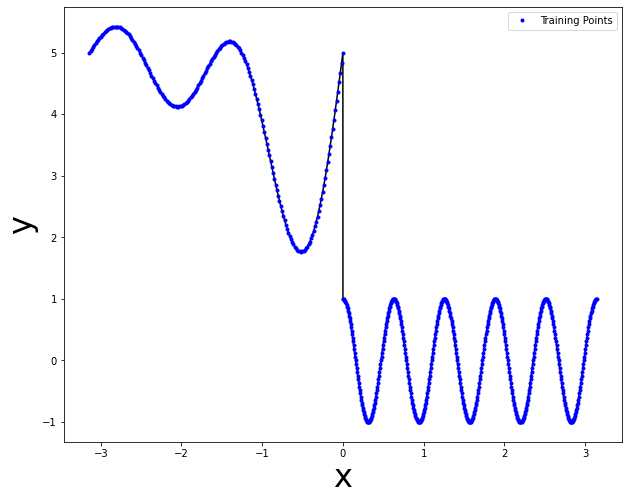

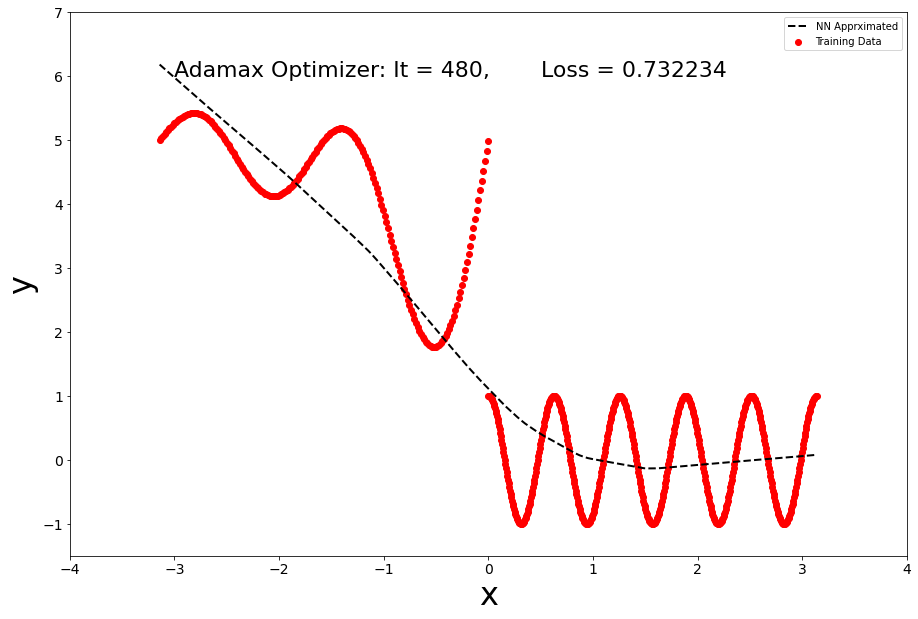

In [5]:
# Implementation of SparseAdam
print('Adamax Optimization')

import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam, RMSprop, Adamax
from torch.utils.data import Dataset, DataLoader


%matplotlib inline
torch.manual_seed(1234) 


def fun_x(x):
    if x < 0.:
        f = 5.0 + np.sin(x) + np.sin(2.*x) + np.sin(3.*x) + np.sin(4.*x)
    else:
        f = np.cos(10.*x)
    return f

fig, ax1 = plt.subplots(1, 1, figsize=(10,8))
x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
x_in_r = np.linspace(0., np.pi, 501)
y_in_l = np.array([fun_x(i) for i in x_in_l])
y_in_r = np.array([fun_x(i) for i in x_in_r])
x_in = np.concatenate((x_in_l, x_in_r), axis=0)
y_in = np.array([fun_x(i) for i in x_in])
ax1.plot(x_in, y_in, 'k-')
ax1.plot(x_in, y_in, '.b', label="Training Points")
ax1.set_xlabel('x', fontsize=32)
ax1.set_ylabel('y', fontsize=32)
ax1.legend()

x = torch.from_numpy(x_in.reshape(-1,1)).float()
y = torch.from_numpy(y_in.reshape(-1,1)).float()




loss_function = torch.nn.MSELoss()
Niter_adamax = 500


Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.ReLU(),
      torch.nn.Linear(100, 1))

optimizer_adamax = torch.optim.Adamax(Net.parameters(), lr = 0.001)    

fig_3, ax_3 = plt.subplots(figsize=(15,10))
image_list3 = []
adamax_loss = []

x = Variable(x)
y = Variable(y)

for it in range(Niter_adamax):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  # Notice the order: NN Pred first and then actual value
    optimizer_adamax.zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer_adamax.step()    
    adamax_loss.append(loss)
    print(f"Epoch: {it + 1:02}/{Niter_adamax} Loss: {loss:.5e}")
    y_pred = Net(x)
    y_test = y_pred.detach().numpy()
    if it%20==0:
        plt.cla()
        ax_3.set_xlabel('x', fontsize=32)
        ax_3.set_ylabel('y', fontsize=32)
        ax_3.set_xlim(-4, 4)
        ax_3.set_ylim(-1.5, 7.0)
        ax_3.scatter(x_in, y_in, color = "red", label="Training Data")
        ax_3.plot(x_in, y_test, 'k--', lw=2,  label="NN Apprximated")
        ax_3.text(-3, 6.0, 'Adamax Optimizer: It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
        ax_3.text(0.5, 6.0, 'Loss = %.6f' % loss,
                fontdict={'size': 22, 'color':  'black'})
        ax_3.tick_params(axis='x', labelsize=14)
        ax_3.tick_params(axis='y', labelsize=14)
        ax_3.legend()

        fig_3.canvas.draw()      
        image3 = np.frombuffer(fig_3.canvas.tostring_rgb(), dtype='uint8')
        image3  = image.reshape(fig_3.canvas.get_width_height()[::-1] + (3,))

        image_list3.append(image3)

imageio.mimsave('./Adamax_func.gif', image_list3, fps=1)
ep_adamax = np.arange(500)+1


Adagrad Optimization
Epoch: 01/500 Loss: 6.23648e+00
Epoch: 02/500 Loss: 6.06708e+00
Epoch: 03/500 Loss: 5.95153e+00
Epoch: 04/500 Loss: 5.85946e+00
Epoch: 05/500 Loss: 5.78127e+00
Epoch: 06/500 Loss: 5.71249e+00
Epoch: 07/500 Loss: 5.65063e+00
Epoch: 08/500 Loss: 5.59411e+00
Epoch: 09/500 Loss: 5.54188e+00
Epoch: 10/500 Loss: 5.49319e+00
Epoch: 11/500 Loss: 5.44748e+00
Epoch: 12/500 Loss: 5.40432e+00
Epoch: 13/500 Loss: 5.36337e+00
Epoch: 14/500 Loss: 5.32438e+00
Epoch: 15/500 Loss: 5.28710e+00
Epoch: 16/500 Loss: 5.25138e+00
Epoch: 17/500 Loss: 5.21704e+00
Epoch: 18/500 Loss: 5.18396e+00
Epoch: 19/500 Loss: 5.15204e+00
Epoch: 20/500 Loss: 5.12117e+00
Epoch: 21/500 Loss: 5.09127e+00
Epoch: 22/500 Loss: 5.06227e+00
Epoch: 23/500 Loss: 5.03410e+00
Epoch: 24/500 Loss: 5.00671e+00
Epoch: 25/500 Loss: 4.98004e+00
Epoch: 26/500 Loss: 4.95405e+00
Epoch: 27/500 Loss: 4.92870e+00
Epoch: 28/500 Loss: 4.90395e+00
Epoch: 29/500 Loss: 4.87976e+00
Epoch: 30/500 Loss: 4.85612e+00
Epoch: 31/500 Loss:

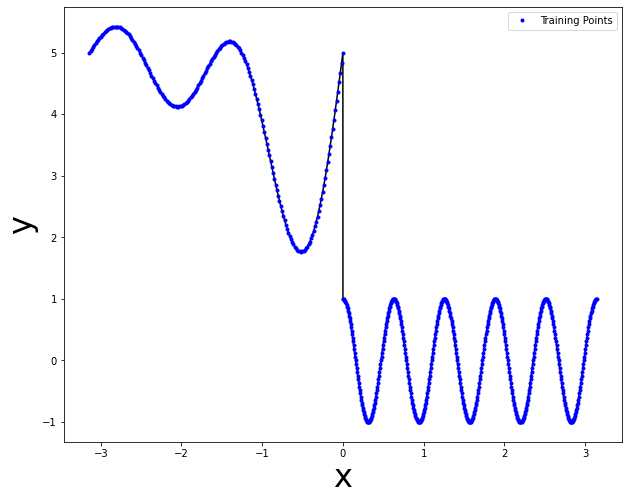

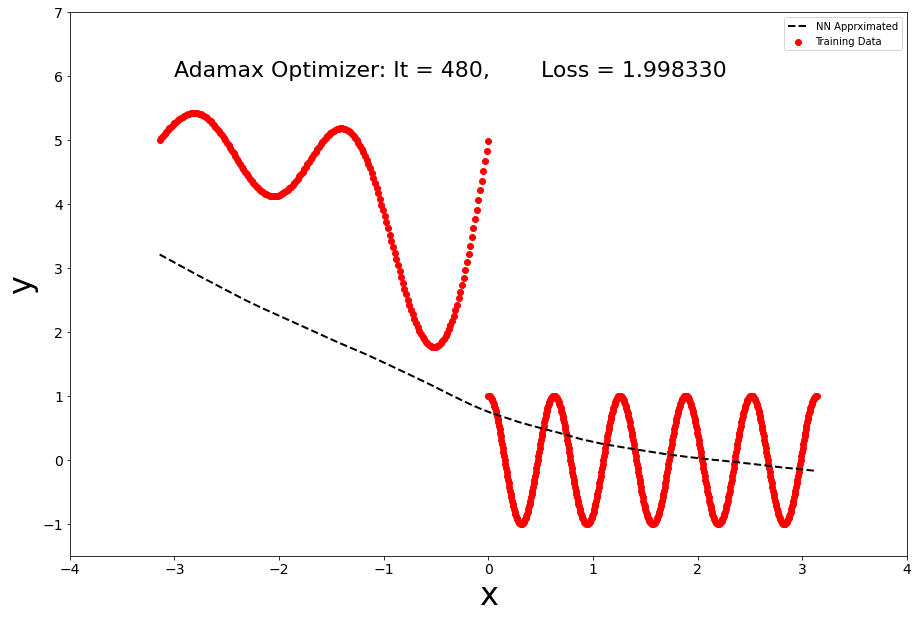

In [6]:
# Implementation of Adagrad
print('Adagrad Optimization')

import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam, RMSprop, Adamax, Adagrad
from torch.utils.data import Dataset, DataLoader


%matplotlib inline
torch.manual_seed(1234) 


def fun_x(x):
    if x < 0.:
        f = 5.0 + np.sin(x) + np.sin(2.*x) + np.sin(3.*x) + np.sin(4.*x)
    else:
        f = np.cos(10.*x)
    return f

fig, ax1 = plt.subplots(1, 1, figsize=(10,8))
x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
x_in_r = np.linspace(0., np.pi, 501)
y_in_l = np.array([fun_x(i) for i in x_in_l])
y_in_r = np.array([fun_x(i) for i in x_in_r])
x_in = np.concatenate((x_in_l, x_in_r), axis=0)
y_in = np.array([fun_x(i) for i in x_in])
ax1.plot(x_in, y_in, 'k-')
ax1.plot(x_in, y_in, '.b', label="Training Points")
ax1.set_xlabel('x', fontsize=32)
ax1.set_ylabel('y', fontsize=32)
ax1.legend()

x = torch.from_numpy(x_in.reshape(-1,1)).float()
y = torch.from_numpy(y_in.reshape(-1,1)).float()




loss_function = torch.nn.MSELoss()
Niter_adagrad = 500


Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.ReLU(),
      torch.nn.Linear(100, 1))

optimizer_adagrad = torch.optim.Adagrad(Net.parameters(), lr = 0.001)    

fig_4, ax_4 = plt.subplots(figsize=(15,10))
image_list4 = []
adagrad_loss = []

x = Variable(x)
y = Variable(y)

for it in range(Niter_adagrad):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  # Notice the order: NN Pred first and then actual value
    optimizer_adagrad.zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer_adagrad.step()    
    adagrad_loss.append(loss)
    print(f"Epoch: {it + 1:02}/{Niter_adamax} Loss: {loss:.5e}")
    y_pred = Net(x)
    y_test = y_pred.detach().numpy()
    if it%20==0:
        plt.cla()
        ax_4.set_xlabel('x', fontsize=32)
        ax_4.set_ylabel('y', fontsize=32)
        ax_4.set_xlim(-4, 4)
        ax_4.set_ylim(-1.5, 7.0)
        ax_4.scatter(x_in, y_in, color = "red", label="Training Data")
        ax_4.plot(x_in, y_test, 'k--', lw=2,  label="NN Apprximated")
        ax_4.text(-3, 6.0, 'Adamax Optimizer: It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
        ax_4.text(0.5, 6.0, 'Loss = %.6f' % loss,
                fontdict={'size': 22, 'color':  'black'})
        ax_4.tick_params(axis='x', labelsize=14)
        ax_4.tick_params(axis='y', labelsize=14)
        ax_4.legend()

        fig_4.canvas.draw()      
        image4 = np.frombuffer(fig_4.canvas.tostring_rgb(), dtype='uint8')
        image4  = image.reshape(fig_4.canvas.get_width_height()[::-1] + (3,))

        image_list4.append(image4)

imageio.mimsave('./Adagrad_func.gif', image_list4, fps=5)
ep_adagrad = np.arange(500)+1


Adadelta Optimization
Epoch: 01/500 Loss: 6.23648e+00
Epoch: 02/500 Loss: 6.23594e+00
Epoch: 03/500 Loss: 6.23538e+00
Epoch: 04/500 Loss: 6.23482e+00
Epoch: 05/500 Loss: 6.23424e+00
Epoch: 06/500 Loss: 6.23366e+00
Epoch: 07/500 Loss: 6.23308e+00
Epoch: 08/500 Loss: 6.23249e+00
Epoch: 09/500 Loss: 6.23189e+00
Epoch: 10/500 Loss: 6.23130e+00
Epoch: 11/500 Loss: 6.23069e+00
Epoch: 12/500 Loss: 6.23009e+00
Epoch: 13/500 Loss: 6.22948e+00
Epoch: 14/500 Loss: 6.22887e+00
Epoch: 15/500 Loss: 6.22825e+00
Epoch: 16/500 Loss: 6.22764e+00
Epoch: 17/500 Loss: 6.22702e+00
Epoch: 18/500 Loss: 6.22639e+00
Epoch: 19/500 Loss: 6.22577e+00
Epoch: 20/500 Loss: 6.22514e+00
Epoch: 21/500 Loss: 6.22451e+00
Epoch: 22/500 Loss: 6.22388e+00
Epoch: 23/500 Loss: 6.22324e+00
Epoch: 24/500 Loss: 6.22260e+00
Epoch: 25/500 Loss: 6.22196e+00
Epoch: 26/500 Loss: 6.22132e+00
Epoch: 27/500 Loss: 6.22067e+00
Epoch: 28/500 Loss: 6.22003e+00
Epoch: 29/500 Loss: 6.21938e+00
Epoch: 30/500 Loss: 6.21872e+00
Epoch: 31/500 Loss

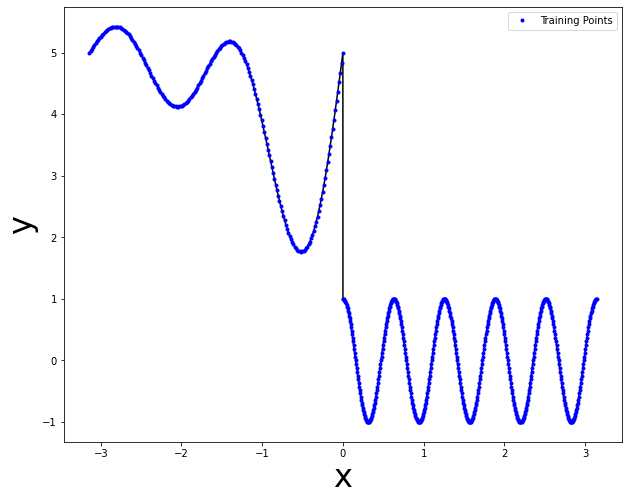

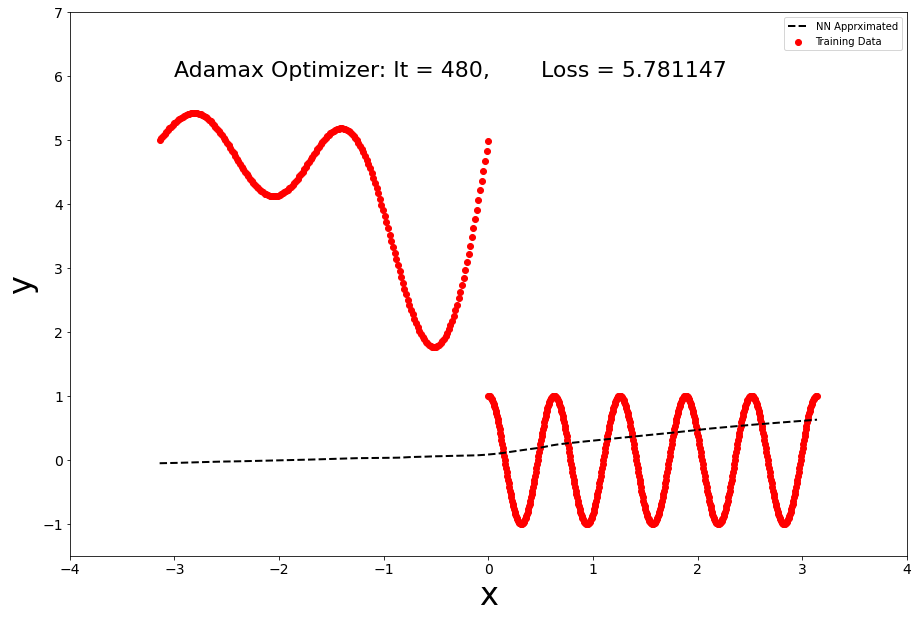

In [7]:
# Implementation of Adadelta
print('Adadelta Optimization')

import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam, RMSprop, Adamax, Adagrad, Adadelta
from torch.utils.data import Dataset, DataLoader


%matplotlib inline
torch.manual_seed(1234) 


def fun_x(x):
    if x < 0.:
        f = 5.0 + np.sin(x) + np.sin(2.*x) + np.sin(3.*x) + np.sin(4.*x)
    else:
        f = np.cos(10.*x)
    return f

fig, ax1 = plt.subplots(1, 1, figsize=(10,8))
x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
x_in_r = np.linspace(0., np.pi, 501)
y_in_l = np.array([fun_x(i) for i in x_in_l])
y_in_r = np.array([fun_x(i) for i in x_in_r])
x_in = np.concatenate((x_in_l, x_in_r), axis=0)
y_in = np.array([fun_x(i) for i in x_in])
ax1.plot(x_in, y_in, 'k-')
ax1.plot(x_in, y_in, '.b', label="Training Points")
ax1.set_xlabel('x', fontsize=32)
ax1.set_ylabel('y', fontsize=32)
ax1.legend()

x = torch.from_numpy(x_in.reshape(-1,1)).float()
y = torch.from_numpy(y_in.reshape(-1,1)).float()




loss_function = torch.nn.MSELoss()
Niter_adadelta = 500


Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.ReLU(),
      torch.nn.Linear(100, 1))

optimizer_adadelta = torch.optim.Adadelta(Net.parameters(), lr = 0.001)    

fig_5, ax_5 = plt.subplots(figsize=(15,10))
image_list5 = []
adadelta_loss = []

x = Variable(x)
y = Variable(y)

for it in range(Niter_adadelta):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  # Notice the order: NN Pred first and then actual value
    optimizer_adadelta.zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer_adadelta.step()    
    adadelta_loss.append(loss)
    print(f"Epoch: {it + 1:02}/{Niter_adadelta} Loss: {loss:.5e}")
    y_pred = Net(x)
    y_test = y_pred.detach().numpy()
    if it%20==0:
        plt.cla()
        ax_5.set_xlabel('x', fontsize=32)
        ax_5.set_ylabel('y', fontsize=32)
        ax_5.set_xlim(-4, 4)
        ax_5.set_ylim(-1.5, 7.0)
        ax_5.scatter(x_in, y_in, color = "red", label="Training Data")
        ax_5.plot(x_in, y_test, 'k--', lw=2,  label="NN Apprximated")
        ax_5.text(-3, 6.0, 'Adamax Optimizer: It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
        ax_5.text(0.5, 6.0, 'Loss = %.6f' % loss,
                fontdict={'size': 22, 'color':  'black'})
        ax_5.tick_params(axis='x', labelsize=14)
        ax_5.tick_params(axis='y', labelsize=14)
        ax_5.legend()

        fig_5.canvas.draw()      
        image5 = np.frombuffer(fig_5.canvas.tostring_rgb(), dtype='uint8')
        image5  = image5.reshape(fig_5.canvas.get_width_height()[::-1] + (3,))

        image_list5.append(image5)

imageio.mimsave('./Adadelta_func.gif', image_list5, fps=5)
ep_adadelta = np.arange(500)+1


Nestrov Optimization
Epoch: 01/500 Loss: 6.23648e+00
Epoch: 02/500 Loss: 5.26692e+00
Epoch: 03/500 Loss: 4.07141e+00
Epoch: 04/500 Loss: 2.86448e+00
Epoch: 05/500 Loss: 1.84067e+00
Epoch: 06/500 Loss: 1.14188e+00
Epoch: 07/500 Loss: 8.37392e-01
Epoch: 08/500 Loss: 9.18495e-01
Epoch: 09/500 Loss: 1.30748e+00
Epoch: 10/500 Loss: 1.87848e+00
Epoch: 11/500 Loss: 2.48578e+00
Epoch: 12/500 Loss: 2.99362e+00
Epoch: 13/500 Loss: 3.30147e+00
Epoch: 14/500 Loss: 3.35957e+00
Epoch: 15/500 Loss: 3.17251e+00
Epoch: 16/500 Loss: 2.79123e+00
Epoch: 17/500 Loss: 2.29684e+00
Epoch: 18/500 Loss: 1.78102e+00
Epoch: 19/500 Loss: 1.32740e+00
Epoch: 20/500 Loss: 9.97631e-01
Epoch: 21/500 Loss: 8.23709e-01
Epoch: 22/500 Loss: 8.06882e-01
Epoch: 23/500 Loss: 9.21966e-01
Epoch: 24/500 Loss: 1.12541e+00
Epoch: 25/500 Loss: 1.36509e+00
Epoch: 26/500 Loss: 1.59007e+00
Epoch: 27/500 Loss: 1.75866e+00
Epoch: 28/500 Loss: 1.84395e+00
Epoch: 29/500 Loss: 1.83615e+00
Epoch: 30/500 Loss: 1.74195e+00
Epoch: 31/500 Loss:

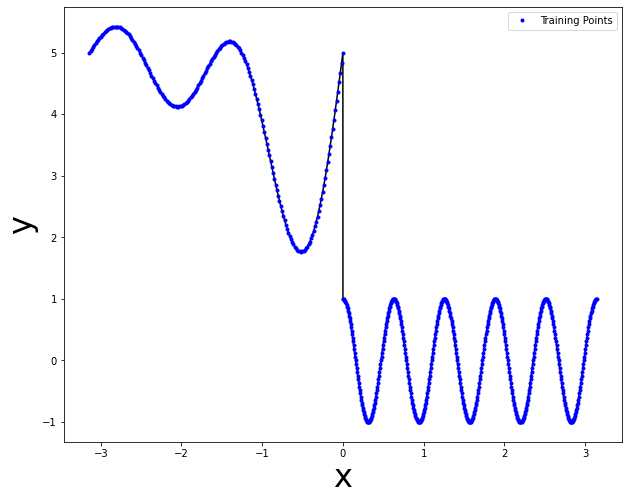

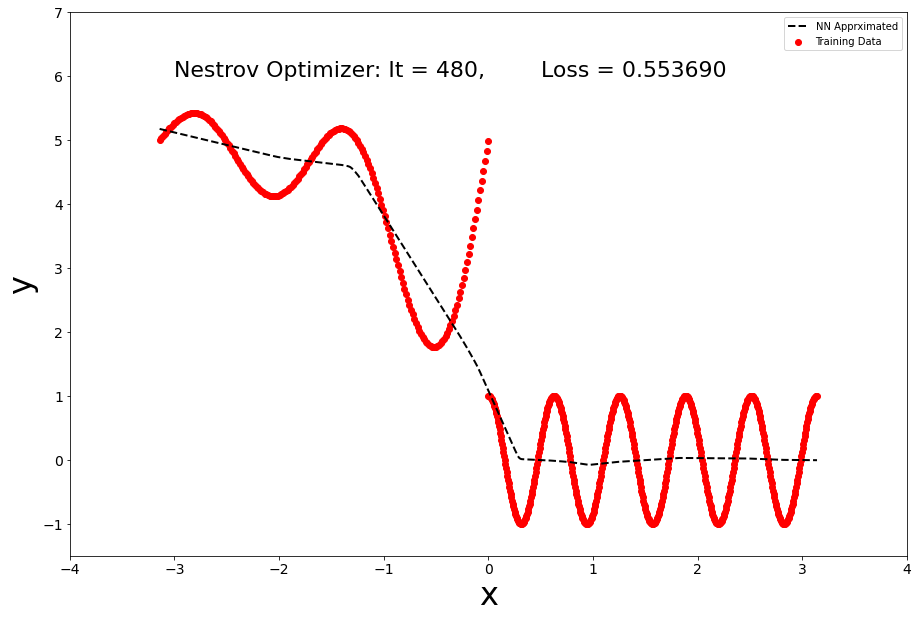

In [8]:
# Implementation of Nestrov
print('Nestrov Optimization')

import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam, RMSprop, Adamax, Adagrad, Adadelta
from torch.utils.data import Dataset, DataLoader


%matplotlib inline
torch.manual_seed(1234) 


def fun_x(x):
    if x < 0.:
        f = 5.0 + np.sin(x) + np.sin(2.*x) + np.sin(3.*x) + np.sin(4.*x)
    else:
        f = np.cos(10.*x)
    return f

fig, ax1 = plt.subplots(1, 1, figsize=(10,8))
x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
x_in_r = np.linspace(0., np.pi, 501)
y_in_l = np.array([fun_x(i) for i in x_in_l])
y_in_r = np.array([fun_x(i) for i in x_in_r])
x_in = np.concatenate((x_in_l, x_in_r), axis=0)
y_in = np.array([fun_x(i) for i in x_in])
ax1.plot(x_in, y_in, 'k-')
ax1.plot(x_in, y_in, '.b', label="Training Points")
ax1.set_xlabel('x', fontsize=32)
ax1.set_ylabel('y', fontsize=32)
ax1.legend()

x = torch.from_numpy(x_in.reshape(-1,1)).float()
y = torch.from_numpy(y_in.reshape(-1,1)).float()




loss_function = torch.nn.MSELoss()
Niter_nestrov = 500


Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.ReLU(),
      torch.nn.Linear(100, 1))

optimizer_nestrov = torch.optim.SGD(Net.parameters(), lr=0.001, momentum=0.99, nesterov=True)    

fig_6, ax_6 = plt.subplots(figsize=(15,10))
image_list6 = []
nestrov_loss = []

x = Variable(x)
y = Variable(y)

for it in range(Niter_nestrov):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  # Notice the order: NN Pred first and then actual value
    optimizer_nestrov.zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer_nestrov.step()    
    nestrov_loss.append(loss)
    print(f"Epoch: {it + 1:02}/{Niter_nestrov} Loss: {loss:.5e}")
    y_pred = Net(x)
    y_test = y_pred.detach().numpy()
    if it%20==0:
        plt.cla()
        ax_6.set_xlabel('x', fontsize=32)
        ax_6.set_ylabel('y', fontsize=32)
        ax_6.set_xlim(-4, 4)
        ax_6.set_ylim(-1.5, 7.0)
        ax_6.scatter(x_in, y_in, color = "red", label="Training Data")
        ax_6.plot(x_in, y_test, 'k--', lw=2,  label="NN Apprximated")
        ax_6.text(-3, 6.0, 'Nestrov Optimizer: It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
        ax_6.text(0.5, 6.0, 'Loss = %.6f' % loss,
                fontdict={'size': 22, 'color':  'black'})
        ax_6.tick_params(axis='x', labelsize=14)
        ax_6.tick_params(axis='y', labelsize=14)
        ax_6.legend()

        fig_6.canvas.draw()      
        image6 = np.frombuffer(fig_6.canvas.tostring_rgb(), dtype='uint8')
        image6  = image6.reshape(fig_6.canvas.get_width_height()[::-1] + (3,))

        image_list6.append(image6)

imageio.mimsave('./Nestrov_func.gif', image_list6, fps=5)
ep_nestrov = np.arange(500)+1


i is: 0
i is: 1
i is: 2
i is: 3
i is: 4
i is: 5
i is: 6
i is: 7
i is: 8
i is: 9
i is: 10
i is: 11
i is: 12
i is: 13
i is: 14
i is: 15
i is: 16
i is: 17
i is: 18
i is: 19
i is: 20
i is: 21
i is: 22
i is: 23
i is: 24
i is: 25
i is: 26
i is: 27
i is: 28
i is: 29
i is: 30
i is: 31
i is: 32
i is: 33
i is: 34
i is: 35
i is: 36
i is: 37
i is: 38
i is: 39
i is: 40
i is: 41
i is: 42
i is: 43
i is: 44
i is: 45
i is: 46
i is: 47
i is: 48
i is: 49
i is: 50
i is: 51
i is: 52
i is: 53
i is: 54
i is: 55
i is: 56
i is: 57
i is: 58
i is: 59
i is: 60
i is: 61
i is: 62
i is: 63
i is: 64
i is: 65
i is: 66
i is: 67
i is: 68
i is: 69
i is: 70
i is: 71
i is: 72
i is: 73
i is: 74
i is: 75
i is: 76
i is: 77
i is: 78
i is: 79
i is: 80
i is: 81
i is: 82
i is: 83
i is: 84
i is: 85
i is: 86
i is: 87
i is: 88
i is: 89
i is: 90
i is: 91
i is: 92
i is: 93
i is: 94
i is: 95
i is: 96
i is: 97
i is: 98
i is: 99
i is: 100
i is: 101
i is: 102
i is: 103
i is: 104
i is: 105
i is: 106
i is: 107
i is: 108
i is: 109
i is: 110


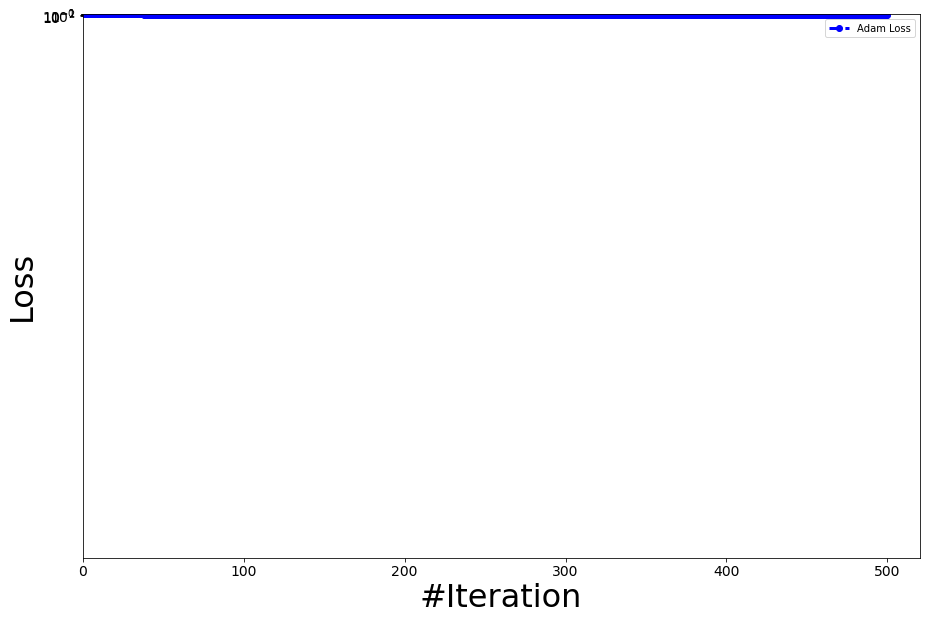

In [9]:
loss_len = len(adam_only_loss) 
loss_adam = np.zeros((loss_len,1))
loss_len

for i in range(loss_len):
    print(f"i is: {i}")
    loss_adam[i] = adam_only_loss[i].item()
    
la_only = loss_adam.flatten()
fig, ax = plt.subplots(figsize=(15,10))

ax.set_xlabel('#Iteration', fontsize=32)
ax.set_ylabel('Loss', fontsize=32)
ax.set_xlim(0, 520)
ax.set_ylim(10^-3, 10^2)
ax.semilogy(ep_adam, la_only, 'bo--', lw=3, label="Adam Loss")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend()
plt.savefig("./Adam_loss.png")


i is: 0
i is: 1
i is: 2
i is: 3
i is: 4
i is: 5
i is: 6
i is: 7
i is: 8
i is: 9
i is: 10
i is: 11
i is: 12
i is: 13
i is: 14
i is: 15
i is: 16
i is: 17
i is: 18
i is: 19
i is: 20
i is: 21
i is: 22
i is: 23
i is: 24
i is: 25
i is: 26
i is: 27
i is: 28
i is: 29
i is: 30
i is: 31
i is: 32
i is: 33
i is: 34
i is: 35
i is: 36
i is: 37
i is: 38
i is: 39
i is: 40
i is: 41
i is: 42
i is: 43
i is: 44
i is: 45
i is: 46
i is: 47
i is: 48
i is: 49
i is: 50
i is: 51
i is: 52
i is: 53
i is: 54
i is: 55
i is: 56
i is: 57
i is: 58
i is: 59
i is: 60
i is: 61
i is: 62
i is: 63
i is: 64
i is: 65
i is: 66
i is: 67
i is: 68
i is: 69
i is: 70
i is: 71
i is: 72
i is: 73
i is: 74
i is: 75
i is: 76
i is: 77
i is: 78
i is: 79
i is: 80
i is: 81
i is: 82
i is: 83
i is: 84
i is: 85
i is: 86
i is: 87
i is: 88
i is: 89
i is: 90
i is: 91
i is: 92
i is: 93
i is: 94
i is: 95
i is: 96
i is: 97
i is: 98
i is: 99
i is: 100
i is: 101
i is: 102
i is: 103
i is: 104
i is: 105
i is: 106
i is: 107
i is: 108
i is: 109
i is: 110


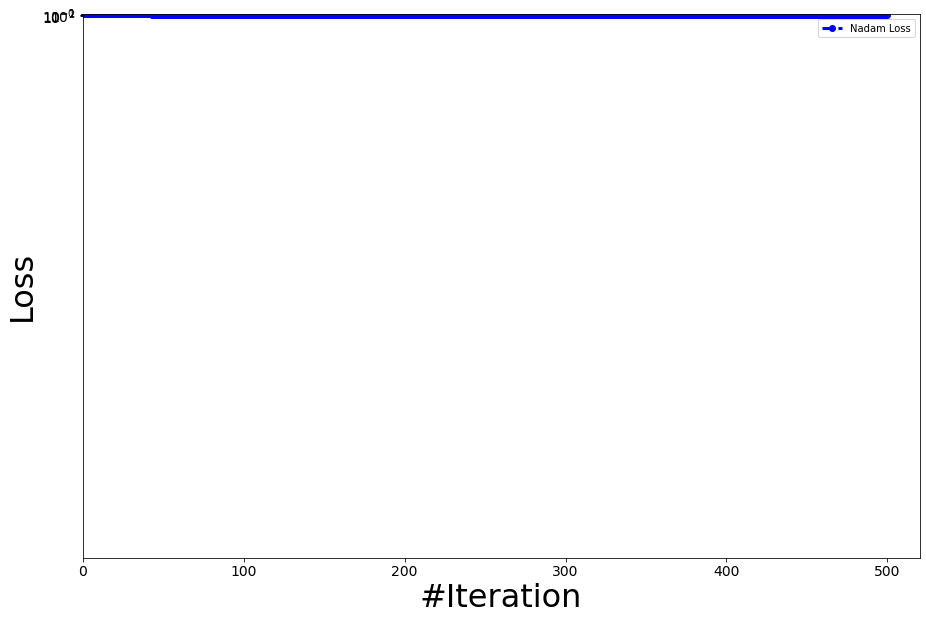

In [10]:
loss_len_1 = len(Nadam_loss) 
loss_nadam = np.zeros((loss_len_1,1))
loss_len_1

for i in range(loss_len_1):
    print(f"i is: {i}")
    loss_nadam[i] = Nadam_loss[i].item()
    
nadam_plt = loss_nadam.flatten()
fig, ax = plt.subplots(figsize=(15,10))

ax.set_xlabel('#Iteration', fontsize=32)
ax.set_ylabel('Loss', fontsize=32)
ax.set_xlim(0, 520)
ax.set_ylim(10^-3, 10^2)
ax.semilogy(ep_nadam, nadam_plt, 'bo--', lw=3, label="Nadam Loss")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend()
plt.savefig("./NAdam_loss.png")


i is: 0
i is: 1
i is: 2
i is: 3
i is: 4
i is: 5
i is: 6
i is: 7
i is: 8
i is: 9
i is: 10
i is: 11
i is: 12
i is: 13
i is: 14
i is: 15
i is: 16
i is: 17
i is: 18
i is: 19
i is: 20
i is: 21
i is: 22
i is: 23
i is: 24
i is: 25
i is: 26
i is: 27
i is: 28
i is: 29
i is: 30
i is: 31
i is: 32
i is: 33
i is: 34
i is: 35
i is: 36
i is: 37
i is: 38
i is: 39
i is: 40
i is: 41
i is: 42
i is: 43
i is: 44
i is: 45
i is: 46
i is: 47
i is: 48
i is: 49
i is: 50
i is: 51
i is: 52
i is: 53
i is: 54
i is: 55
i is: 56
i is: 57
i is: 58
i is: 59
i is: 60
i is: 61
i is: 62
i is: 63
i is: 64
i is: 65
i is: 66
i is: 67
i is: 68
i is: 69
i is: 70
i is: 71
i is: 72
i is: 73
i is: 74
i is: 75
i is: 76
i is: 77
i is: 78
i is: 79
i is: 80
i is: 81
i is: 82
i is: 83
i is: 84
i is: 85
i is: 86
i is: 87
i is: 88
i is: 89
i is: 90
i is: 91
i is: 92
i is: 93
i is: 94
i is: 95
i is: 96
i is: 97
i is: 98
i is: 99
i is: 100
i is: 101
i is: 102
i is: 103
i is: 104
i is: 105
i is: 106
i is: 107
i is: 108
i is: 109
i is: 110


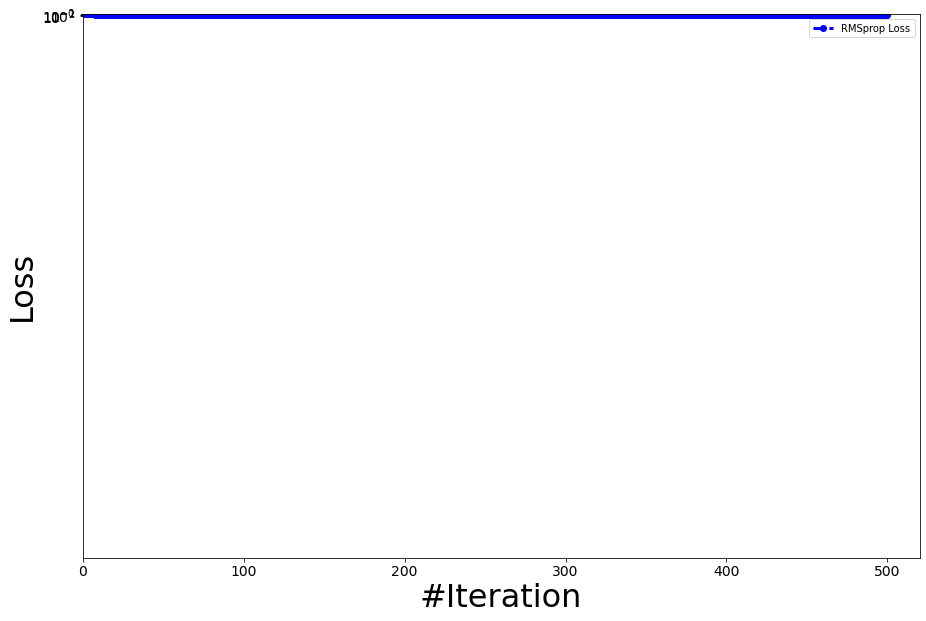

In [11]:
loss_len_2 = len(RMS_loss) 
loss_RMS = np.zeros((loss_len_2,1))
loss_len_2

for i in range(loss_len_2):
    print(f"i is: {i}")
    loss_RMS[i] = RMS_loss[i].item()
    
RMS_plt = loss_RMS.flatten()
fig, ax = plt.subplots(figsize=(15,10))

ax.set_xlabel('#Iteration', fontsize=32)
ax.set_ylabel('Loss', fontsize=32)
ax.set_xlim(0, 520)
ax.set_ylim(10^-3, 10^2)
ax.semilogy(ep_RMS, RMS_plt, 'bo--', lw=3, label="RMSprop Loss")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend()
plt.savefig("./RMS_loss.png")


i is: 0
i is: 1
i is: 2
i is: 3
i is: 4
i is: 5
i is: 6
i is: 7
i is: 8
i is: 9
i is: 10
i is: 11
i is: 12
i is: 13
i is: 14
i is: 15
i is: 16
i is: 17
i is: 18
i is: 19
i is: 20
i is: 21
i is: 22
i is: 23
i is: 24
i is: 25
i is: 26
i is: 27
i is: 28
i is: 29
i is: 30
i is: 31
i is: 32
i is: 33
i is: 34
i is: 35
i is: 36
i is: 37
i is: 38
i is: 39
i is: 40
i is: 41
i is: 42
i is: 43
i is: 44
i is: 45
i is: 46
i is: 47
i is: 48
i is: 49
i is: 50
i is: 51
i is: 52
i is: 53
i is: 54
i is: 55
i is: 56
i is: 57
i is: 58
i is: 59
i is: 60
i is: 61
i is: 62
i is: 63
i is: 64
i is: 65
i is: 66
i is: 67
i is: 68
i is: 69
i is: 70
i is: 71
i is: 72
i is: 73
i is: 74
i is: 75
i is: 76
i is: 77
i is: 78
i is: 79
i is: 80
i is: 81
i is: 82
i is: 83
i is: 84
i is: 85
i is: 86
i is: 87
i is: 88
i is: 89
i is: 90
i is: 91
i is: 92
i is: 93
i is: 94
i is: 95
i is: 96
i is: 97
i is: 98
i is: 99
i is: 100
i is: 101
i is: 102
i is: 103
i is: 104
i is: 105
i is: 106
i is: 107
i is: 108
i is: 109
i is: 110


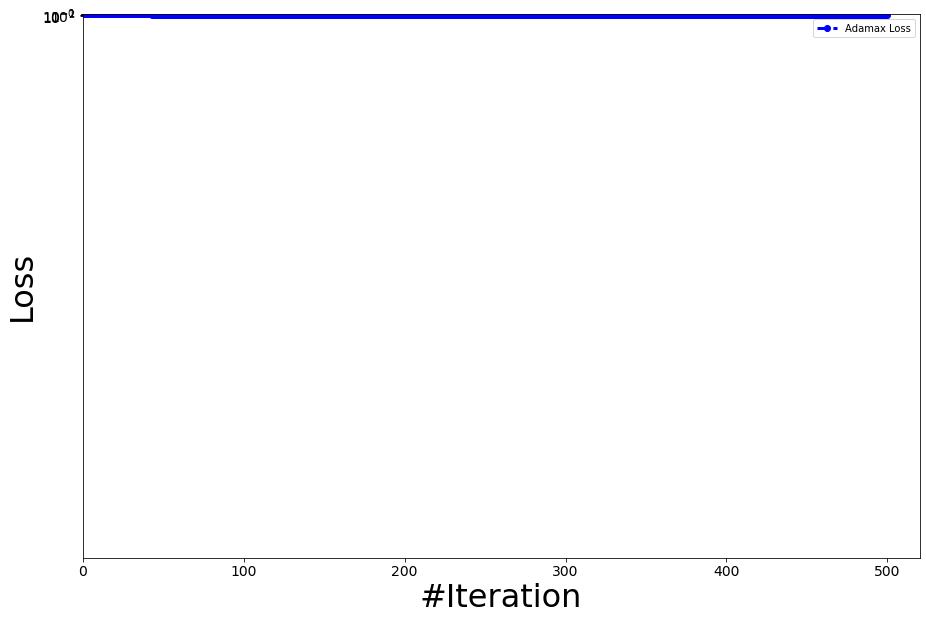

In [12]:
loss_len_3 = len(adamax_loss) 
loss_adamax = np.zeros((loss_len_3,1))
loss_len_3

for i in range(loss_len_3):
    print(f"i is: {i}")
    loss_adamax[i] = adamax_loss[i].item()
    
adamax_plt = loss_adamax.flatten()
fig, ax = plt.subplots(figsize=(15,10))

ax.set_xlabel('#Iteration', fontsize=32)
ax.set_ylabel('Loss', fontsize=32)
ax.set_xlim(0, 520)
ax.set_ylim(10^-3, 10^2)
ax.semilogy(ep_adamax, adamax_plt, 'bo--', lw=3, label="Adamax Loss")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend()
plt.savefig("./Adamax_loss.png")


i is: 0
i is: 1
i is: 2
i is: 3
i is: 4
i is: 5
i is: 6
i is: 7
i is: 8
i is: 9
i is: 10
i is: 11
i is: 12
i is: 13
i is: 14
i is: 15
i is: 16
i is: 17
i is: 18
i is: 19
i is: 20
i is: 21
i is: 22
i is: 23
i is: 24
i is: 25
i is: 26
i is: 27
i is: 28
i is: 29
i is: 30
i is: 31
i is: 32
i is: 33
i is: 34
i is: 35
i is: 36
i is: 37
i is: 38
i is: 39
i is: 40
i is: 41
i is: 42
i is: 43
i is: 44
i is: 45
i is: 46
i is: 47
i is: 48
i is: 49
i is: 50
i is: 51
i is: 52
i is: 53
i is: 54
i is: 55
i is: 56
i is: 57
i is: 58
i is: 59
i is: 60
i is: 61
i is: 62
i is: 63
i is: 64
i is: 65
i is: 66
i is: 67
i is: 68
i is: 69
i is: 70
i is: 71
i is: 72
i is: 73
i is: 74
i is: 75
i is: 76
i is: 77
i is: 78
i is: 79
i is: 80
i is: 81
i is: 82
i is: 83
i is: 84
i is: 85
i is: 86
i is: 87
i is: 88
i is: 89
i is: 90
i is: 91
i is: 92
i is: 93
i is: 94
i is: 95
i is: 96
i is: 97
i is: 98
i is: 99
i is: 100
i is: 101
i is: 102
i is: 103
i is: 104
i is: 105
i is: 106
i is: 107
i is: 108
i is: 109
i is: 110


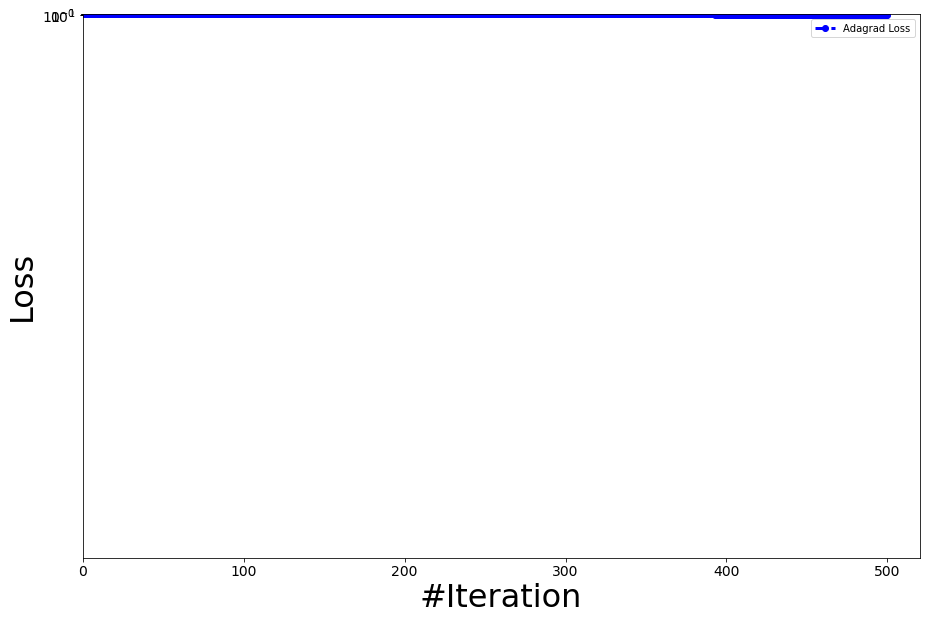

In [13]:
loss_len_4 = len(adagrad_loss) 
loss_adagrad = np.zeros((loss_len_4,1))
loss_len_4

for i in range(loss_len_4):
    print(f"i is: {i}")
    loss_adagrad[i] = adagrad_loss[i].item()
    
adagrad_plt = loss_adagrad.flatten()
fig, ax = plt.subplots(figsize=(15,10))

ax.set_xlabel('#Iteration', fontsize=32)
ax.set_ylabel('Loss', fontsize=32)
ax.set_xlim(0, 520)
ax.set_ylim(10^-3, 10^2)
ax.semilogy(ep_adagrad, adagrad_plt, 'bo--', lw=3, label="Adagrad Loss")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend()
plt.savefig("./Adagrad_loss.png")


i is: 0
i is: 1
i is: 2
i is: 3
i is: 4
i is: 5
i is: 6
i is: 7
i is: 8
i is: 9
i is: 10
i is: 11
i is: 12
i is: 13
i is: 14
i is: 15
i is: 16
i is: 17
i is: 18
i is: 19
i is: 20
i is: 21
i is: 22
i is: 23
i is: 24
i is: 25
i is: 26
i is: 27
i is: 28
i is: 29
i is: 30
i is: 31
i is: 32
i is: 33
i is: 34
i is: 35
i is: 36
i is: 37
i is: 38
i is: 39
i is: 40
i is: 41
i is: 42
i is: 43
i is: 44
i is: 45
i is: 46
i is: 47
i is: 48
i is: 49
i is: 50
i is: 51
i is: 52
i is: 53
i is: 54
i is: 55
i is: 56
i is: 57
i is: 58
i is: 59
i is: 60
i is: 61
i is: 62
i is: 63
i is: 64
i is: 65
i is: 66
i is: 67
i is: 68
i is: 69
i is: 70
i is: 71
i is: 72
i is: 73
i is: 74
i is: 75
i is: 76
i is: 77
i is: 78
i is: 79
i is: 80
i is: 81
i is: 82
i is: 83
i is: 84
i is: 85
i is: 86
i is: 87
i is: 88
i is: 89
i is: 90
i is: 91
i is: 92
i is: 93
i is: 94
i is: 95
i is: 96
i is: 97
i is: 98
i is: 99
i is: 100
i is: 101
i is: 102
i is: 103
i is: 104
i is: 105
i is: 106
i is: 107
i is: 108
i is: 109
i is: 110


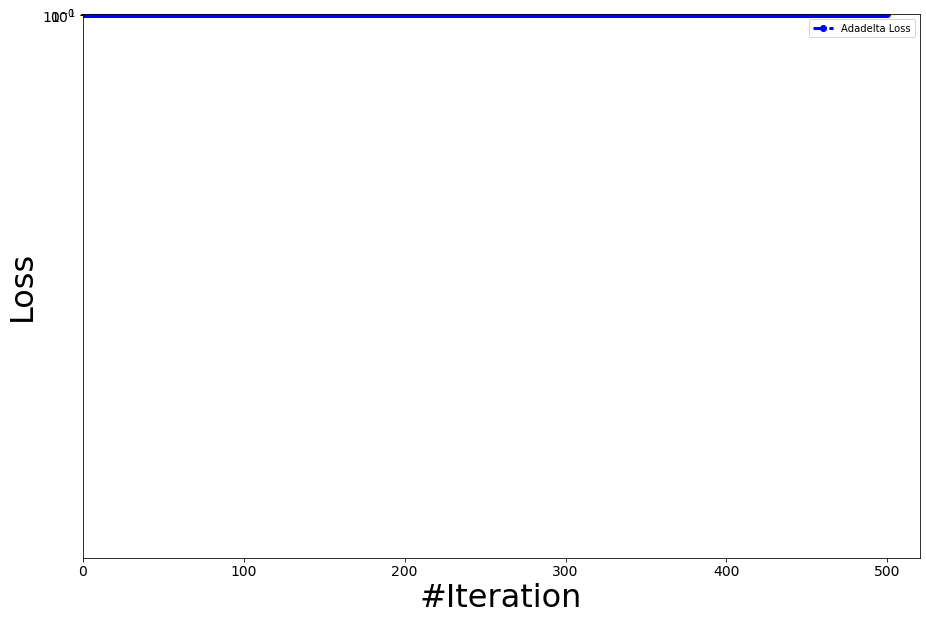

In [14]:
loss_len_5= len(adadelta_loss) 
loss_adadelta= np.zeros((loss_len_5,1))
loss_len_5

for i in range(loss_len_5):
    print(f"i is: {i}")
    loss_adadelta[i] = adadelta_loss[i].item()
    
adadelta_plt = loss_adadelta.flatten()
fig, ax = plt.subplots(figsize=(15,10))

ax.set_xlabel('#Iteration', fontsize=32)
ax.set_ylabel('Loss', fontsize=32)
ax.set_xlim(0, 520)
ax.set_ylim(10^-3, 10^2)
ax.semilogy(ep_adadelta, adadelta_plt, 'bo--', lw=3, label="Adadelta Loss")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend()
plt.savefig("./Adadelta_loss.png")


i is: 0
i is: 1
i is: 2
i is: 3
i is: 4
i is: 5
i is: 6
i is: 7
i is: 8
i is: 9
i is: 10
i is: 11
i is: 12
i is: 13
i is: 14
i is: 15
i is: 16
i is: 17
i is: 18
i is: 19
i is: 20
i is: 21
i is: 22
i is: 23
i is: 24
i is: 25
i is: 26
i is: 27
i is: 28
i is: 29
i is: 30
i is: 31
i is: 32
i is: 33
i is: 34
i is: 35
i is: 36
i is: 37
i is: 38
i is: 39
i is: 40
i is: 41
i is: 42
i is: 43
i is: 44
i is: 45
i is: 46
i is: 47
i is: 48
i is: 49
i is: 50
i is: 51
i is: 52
i is: 53
i is: 54
i is: 55
i is: 56
i is: 57
i is: 58
i is: 59
i is: 60
i is: 61
i is: 62
i is: 63
i is: 64
i is: 65
i is: 66
i is: 67
i is: 68
i is: 69
i is: 70
i is: 71
i is: 72
i is: 73
i is: 74
i is: 75
i is: 76
i is: 77
i is: 78
i is: 79
i is: 80
i is: 81
i is: 82
i is: 83
i is: 84
i is: 85
i is: 86
i is: 87
i is: 88
i is: 89
i is: 90
i is: 91
i is: 92
i is: 93
i is: 94
i is: 95
i is: 96
i is: 97
i is: 98
i is: 99
i is: 100
i is: 101
i is: 102
i is: 103
i is: 104
i is: 105
i is: 106
i is: 107
i is: 108
i is: 109
i is: 110


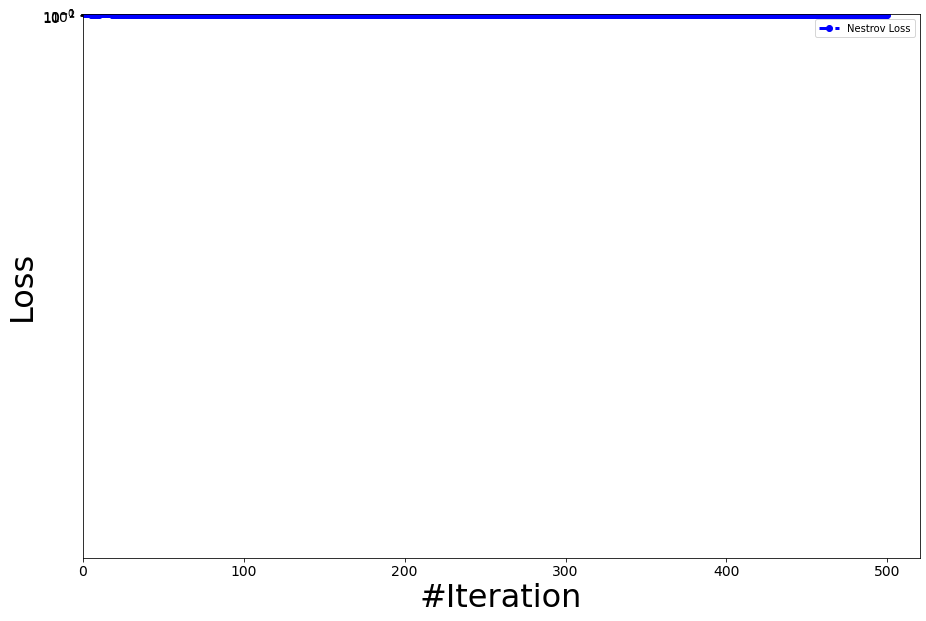

In [15]:
loss_len_6= len(nestrov_loss) 
loss_nestrov= np.zeros((loss_len_6,1))

for i in range(loss_len_6):
    print(f"i is: {i}")
    loss_nestrov[i] = nestrov_loss[i].item()
    
nestrov_plt = loss_nestrov.flatten()
fig, ax = plt.subplots(figsize=(15,10))

ax.set_xlabel('#Iteration', fontsize=32)
ax.set_ylabel('Loss', fontsize=32)
ax.set_xlim(0, 520)
ax.set_ylim(10^-3, 10^2)
ax.semilogy(ep_nestrov, nestrov_plt, 'bo--', lw=3, label="Nestrov Loss")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend()
plt.savefig("./Nestrov_loss.png")


Epoch: 01/30 Loss: 6.23648e+00
Epoch: 02/30 Loss: 6.06708e+00
Epoch: 03/30 Loss: 5.90236e+00
Epoch: 04/30 Loss: 5.74237e+00
Epoch: 05/30 Loss: 5.58713e+00
Epoch: 06/30 Loss: 5.43660e+00
Epoch: 07/30 Loss: 5.29071e+00
Epoch: 08/30 Loss: 5.14929e+00
Epoch: 09/30 Loss: 5.01213e+00
Epoch: 10/30 Loss: 4.87900e+00
Epoch: 11/30 Loss: 4.74966e+00
Epoch: 12/30 Loss: 4.62385e+00
Epoch: 13/30 Loss: 4.50134e+00
Epoch: 14/30 Loss: 4.38191e+00
Epoch: 15/30 Loss: 4.26534e+00
Epoch: 16/30 Loss: 4.15145e+00
Epoch: 17/30 Loss: 4.04007e+00
Epoch: 18/30 Loss: 3.93108e+00
Epoch: 19/30 Loss: 3.82437e+00
Epoch: 20/30 Loss: 3.71989e+00
Epoch: 21/30 Loss: 3.61762e+00
Epoch: 22/30 Loss: 3.51753e+00
Epoch: 23/30 Loss: 3.41965e+00
Epoch: 24/30 Loss: 3.32400e+00
Epoch: 25/30 Loss: 3.23061e+00
Epoch: 26/30 Loss: 3.13954e+00
Epoch: 27/30 Loss: 3.05080e+00
Epoch: 28/30 Loss: 2.96442e+00
Epoch: 29/30 Loss: 2.88041e+00
Epoch: 30/30 Loss: 2.79877e+00
in LBFGS Loss
Epoch: 01/50 Loss: 1.55669e-02
Epoch: 02/50 Loss: 1.5511

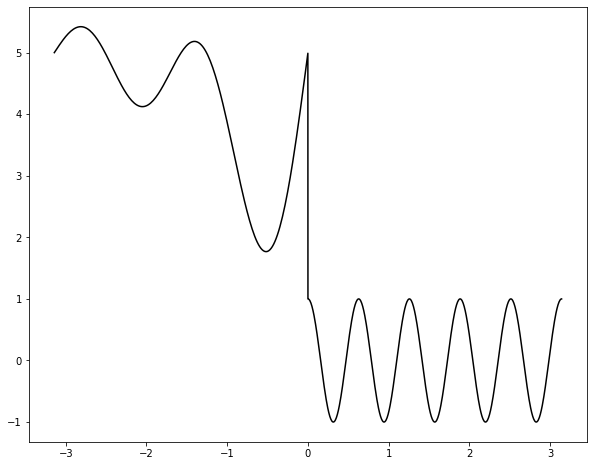

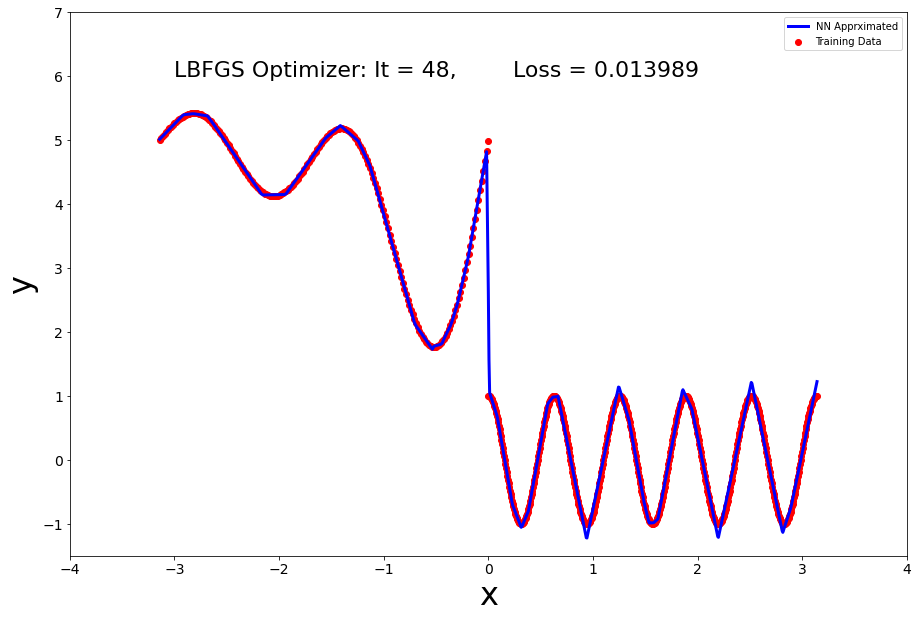

In [16]:
# Combination of Adam + L-BFGS
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam
from torch.utils.data import Dataset, DataLoader


%matplotlib inline
torch.manual_seed(1234) 


def fun_x(x):
    if x < 0.:
        f = 5.0 + np.sin(x) + np.sin(2.*x) + np.sin(3.*x) + np.sin(4.*x)
    else:
        f = np.cos(10.*x)
    return f

fig, ax1 = plt.subplots(1, 1, figsize=(10,8))
x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
x_in_r = np.linspace(0., np.pi, 501)
y_in_l = np.array([fun_x(i) for i in x_in_l])
y_in_r = np.array([fun_x(i) for i in x_in_r])
x_in = np.concatenate((x_in_l, x_in_r), axis=0)
y_in = np.array([fun_x(i) for i in x_in])
ax1.plot(x_in, y_in, 'k-')


x = torch.from_numpy(x_in.reshape(-1,1)).float()
y = torch.from_numpy(y_in.reshape(-1,1)).float()




loss_function = torch.nn.MSELoss()
Niter_Adam = 30
Niter_LBFGS = 50


Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.ReLU(),
      torch.nn.Linear(100, 1))

optimizer_adam = torch.optim.Adam(Net.parameters(), lr = 0.001)
optimizer_lbfgs = LBFGS(Net.parameters(), history_size=8, max_iter=500000)

fig, ax = plt.subplots(figsize=(15,10))
image_list = []
adam_loss = []
lbfgs_loss = []

x = Variable(x)
y = Variable(y)



for it in range(Niter_Adam):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  # Notice the order: NN Pred first and then actual value
    optimizer_adam.zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer_adam.step()    
    adam_loss.append(loss)
    print(f"Epoch: {it + 1:02}/{Niter_Adam} Loss: {loss:.5e}")
    y_pred = Net(x)
    y_test = y_pred.detach().numpy()
    if it % 4 == 0:
        plt.cla()
        ax.set_xlabel('x', fontsize=32)
        ax.set_ylabel('y Predictied', fontsize=32)
        ax.set_xlim(-4, 4)
        ax.set_ylim(-1.5, 7.0)
        ax.scatter(x_in, y_in, color = "red", label="Noisy Data")
        ax.plot(x_in, y_test, 'k--', lw=2,  label="NN Apprximated")
        ax.text(-3, 6.0, 'Adam Optimizer: It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
        ax.text(0.24, 6.0, 'Loss = %.6f' % loss,
                fontdict={'size': 22, 'color':  'black'})
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        ax.legend()

        fig.canvas.draw()      
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        image_list.append(image)
    
print("in LBFGS Loss")

 
for it in range(Niter_LBFGS):
    def closure():
        optimizer_lbfgs.zero_grad()
        y_pred = Net(x)
        loss = loss_function(y_pred, y)
        loss.backward()
        return loss

    optimizer_lbfgs.step(closure)
    loss = closure()        
    lbfgs_loss.append(loss)
    print(f"Epoch: {it + 1:02}/{Niter_LBFGS} Loss: {loss:.5e}")
    y_pred = Net(x)
    y_test = y_pred.detach().numpy()
    if it % 2 == 0:
        plt.cla()
        ax.set_xlabel('x', fontsize=32)
        ax.set_ylabel('y', fontsize=32)
        ax.set_xlim(-4, 4)
        ax.set_ylim(-1.5, 7.0)
        ax.scatter(x_in, y_in, color = "red", label="Training Data")
        ax.plot(x_in, y_test, 'b-', lw=3, label="NN Apprximated")
        ax.text(-3, 6.0, 'LBFGS Optimizer: It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
        ax.text(0.24, 6.0, 'Loss = %.6f' % loss,
                fontdict={'size': 22, 'color':  'black'})
        ax.tick_params(axis='x', labelsize=14)
        ax.tick_params(axis='y', labelsize=14)

        ax.legend()

        fig.canvas.draw()      
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        image_list.append(image)
    
   

imageio.mimsave('./Adam_and_LBFGS.gif', image_list, fps=1)


Epoch: 01/30 Loss: 6.23648e+00
Epoch: 02/30 Loss: 4.74661e+00
Epoch: 03/30 Loss: 3.95394e+00
Epoch: 04/30 Loss: 3.39932e+00
Epoch: 05/30 Loss: 2.97771e+00
Epoch: 06/30 Loss: 2.64297e+00
Epoch: 07/30 Loss: 2.37019e+00
Epoch: 08/30 Loss: 2.14409e+00
Epoch: 09/30 Loss: 1.95451e+00
Epoch: 10/30 Loss: 1.79425e+00
Epoch: 11/30 Loss: 1.65795e+00
Epoch: 12/30 Loss: 1.54156e+00
Epoch: 13/30 Loss: 1.44185e+00
Epoch: 14/30 Loss: 1.35623e+00
Epoch: 15/30 Loss: 1.28259e+00
Epoch: 16/30 Loss: 1.21917e+00
Epoch: 17/30 Loss: 1.16450e+00
Epoch: 18/30 Loss: 1.11733e+00
Epoch: 19/30 Loss: 1.07660e+00
Epoch: 20/30 Loss: 1.04142e+00
Epoch: 21/30 Loss: 1.01099e+00
Epoch: 22/30 Loss: 9.84657e-01
Epoch: 23/30 Loss: 9.61830e-01
Epoch: 24/30 Loss: 9.42015e-01
Epoch: 25/30 Loss: 9.24779e-01
Epoch: 26/30 Loss: 9.09749e-01
Epoch: 27/30 Loss: 8.96608e-01
Epoch: 28/30 Loss: 8.85082e-01
Epoch: 29/30 Loss: 8.74927e-01
Epoch: 30/30 Loss: 8.65946e-01
in LBFGS Loss
Epoch: 01/50 Loss: 1.36044e-02
Epoch: 02/50 Loss: 1.3586

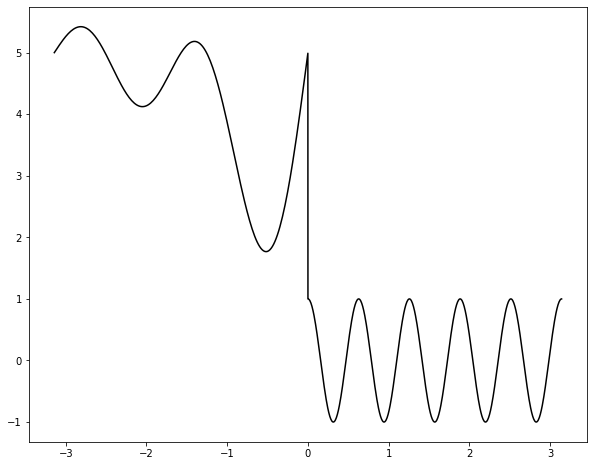

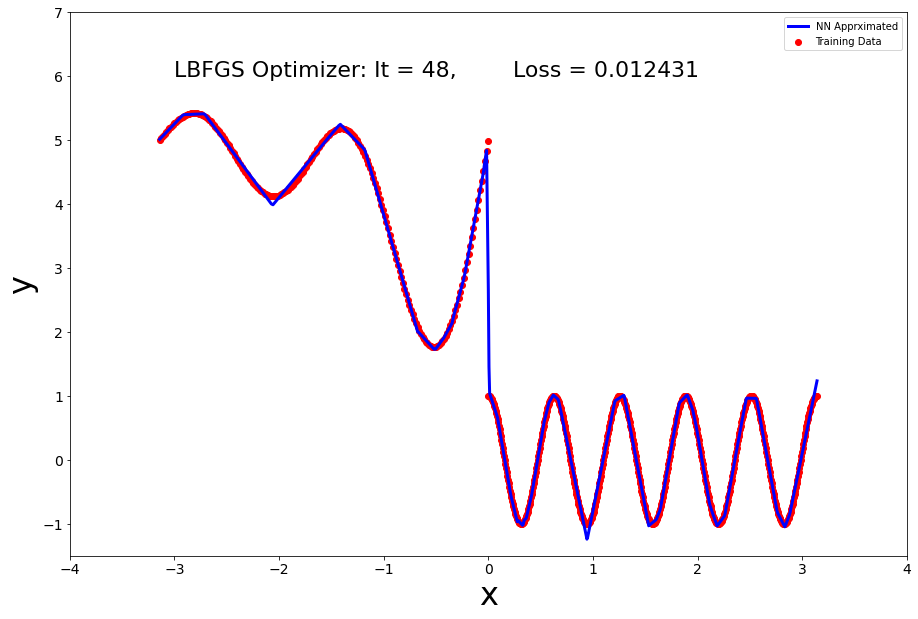

In [17]:
# Combination of RMSprop + L-BFGS
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch.optim import SGD, LBFGS, Adam, RMSprop
from torch.utils.data import Dataset, DataLoader


%matplotlib inline
torch.manual_seed(1234) 


def fun_x(x):
    if x < 0.:
        f = 5.0 + np.sin(x) + np.sin(2.*x) + np.sin(3.*x) + np.sin(4.*x)
    else:
        f = np.cos(10.*x)
    return f

fig, ax1 = plt.subplots(1, 1, figsize=(10,8))
x_in_l = np.linspace(-np.pi, -1.0e-3, 201)
x_in_r = np.linspace(0., np.pi, 501)
y_in_l = np.array([fun_x(i) for i in x_in_l])
y_in_r = np.array([fun_x(i) for i in x_in_r])
x_in = np.concatenate((x_in_l, x_in_r), axis=0)
y_in = np.array([fun_x(i) for i in x_in])
ax1.plot(x_in, y_in, 'k-')


x = torch.from_numpy(x_in.reshape(-1,1)).float()
y = torch.from_numpy(y_in.reshape(-1,1)).float()




loss_function = torch.nn.MSELoss()
Niter_RMSprop = 30
Niter_LBFGS2 = 50


Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.ReLU(),
      torch.nn.Linear(100, 1))

optimizer_RMSprop = torch.optim.RMSprop(Net.parameters(), lr = 0.001)
optimizer_lbfgs2 = LBFGS(Net.parameters(), history_size=8, max_iter=500000)

fig_6, ax_6 = plt.subplots(figsize=(15,10))
image_list6 = []
RMSprop_loss = []
lbfgs2_loss = []

x = Variable(x)
y = Variable(y)



for it in range(Niter_RMSprop):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  # Notice the order: NN Pred first and then actual value
    optimizer_RMSprop .zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer_RMSprop .step()    
    RMSprop_loss.append(loss)
    print(f"Epoch: {it + 1:02}/{Niter_RMSprop} Loss: {loss:.5e}")
    y_pred = Net(x)
    y_test = y_pred.detach().numpy()
    if it % 4 == 0:
        plt.cla()
        ax_6.set_xlabel('x', fontsize=32)
        ax_6.set_ylabel('y Predictied', fontsize=32)
        ax_6.set_xlim(-4, 4)
        ax_6.set_ylim(-1.5, 7.0)
        ax_6.scatter(x_in, y_in, color = "red", label="Noisy Data")
        ax_6.plot(x_in, y_test, 'k--', lw=2,  label="NN Apprximated")
        ax_6.text(-3, 6.0, 'RMSprop: It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
        ax_6.text(0.24, 6.0, 'Loss = %.6f' % loss,
                fontdict={'size': 22, 'color':  'black'})
        ax_6.tick_params(axis='x', labelsize=14)
        ax_6.tick_params(axis='y', labelsize=14)
        ax_6.legend()

        fig_6.canvas.draw()      
        image6 = np.frombuffer(fig_6.canvas.tostring_rgb(), dtype='uint8')
        image6  = image6.reshape(fig_6.canvas.get_width_height()[::-1] + (3,))

        image_list6.append(image6)
    
print("in LBFGS Loss")

 
for it in range(Niter_LBFGS2):
    def closure():
        optimizer_lbfgs2.zero_grad()
        y_pred = Net(x)
        loss = loss_function(y_pred, y)
        loss.backward()
        return loss

    optimizer_lbfgs2.step(closure)
    loss = closure()        
    lbfgs2_loss.append(loss)
    print(f"Epoch: {it + 1:02}/{Niter_LBFGS2} Loss: {loss:.5e}")
    y_pred = Net(x)
    y_test = y_pred.detach().numpy()
    if it % 2 == 0:
        plt.cla()
        ax_6.set_xlabel('x', fontsize=32)
        ax_6.set_ylabel('y', fontsize=32)
        ax_6.set_xlim(-4, 4)
        ax_6.set_ylim(-1.5, 7.0)
        ax_6.scatter(x_in, y_in, color = "red", label="Training Data")
        ax_6.plot(x_in, y_test, 'b-', lw=3, label="NN Apprximated")
        ax_6.text(-3, 6.0, 'LBFGS Optimizer: It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
        ax_6.text(0.24, 6.0, 'Loss = %.6f' % loss,
                fontdict={'size': 22, 'color':  'black'})
        ax_6.tick_params(axis='x', labelsize=14)
        ax_6.tick_params(axis='y', labelsize=14)

        ax_6.legend()

        fig_6.canvas.draw()      
        image6 = np.frombuffer(fig_6.canvas.tostring_rgb(), dtype='uint8')
        image6  = image6.reshape(fig_6.canvas.get_width_height()[::-1] + (3,))

        image_list6.append(image6)
    
   

imageio.mimsave('./RMS_prop_and_LBFGS.gif', image_list6, fps=1)


In [18]:
adam_loss
lbfgs_loss
RMSprop_loss
lbfgs2_loss
Nadam_loss
RMS_loss
adamax_loss
adagrad_loss
adadelta_loss
nestrov_loss
# Adam + L-BFGS
loss_len = len(adam_loss) + len(lbfgs_loss)
loss_total = np.zeros((loss_len,1))
loss_adam = np.zeros((len(adam_loss),1))
loss_lbfgs = np.zeros((len(lbfgs_loss),1))


for i in range(len(adam_loss)):
    loss_adam[i] = adam_loss[i].item()
    
for i in range(len(lbfgs_loss)):
    loss_lbfgs[i] = lbfgs_loss[i].item()

la = loss_adam.flatten()
lm = loss_lbfgs.flatten()
lb = np.copy(lm)
l = np.concatenate((la, lb), axis=0)
lb = np.insert(lb, 0, la[-1], axis=0)
np.shape(lb)


# RMSprop + L-BFGS

loss_len2 = len(RMSprop_loss) + len(lbfgs2_loss)
loss_total2 = np.zeros((loss_len2,1))
loss_RMSprop = np.zeros((len(RMSprop_loss),1))
loss_lbfgs2 = np.zeros((len(lbfgs2_loss),1))

for i in range(len(RMSprop_loss)):
    loss_RMSprop[i] = RMSprop_loss[i].item()
    
for i in range(len(lbfgs2_loss)):
    loss_lbfgs2[i] = lbfgs2_loss[i].item()

la2 = loss_RMSprop.flatten()
lm2 = loss_lbfgs2.flatten()
lb2 = np.copy(lm2)
l2 = np.concatenate((la2, lb2), axis=0)
lb2 = np.insert(lb2, 0, la2[-1], axis=0)
np.shape(lb2)


(51,)

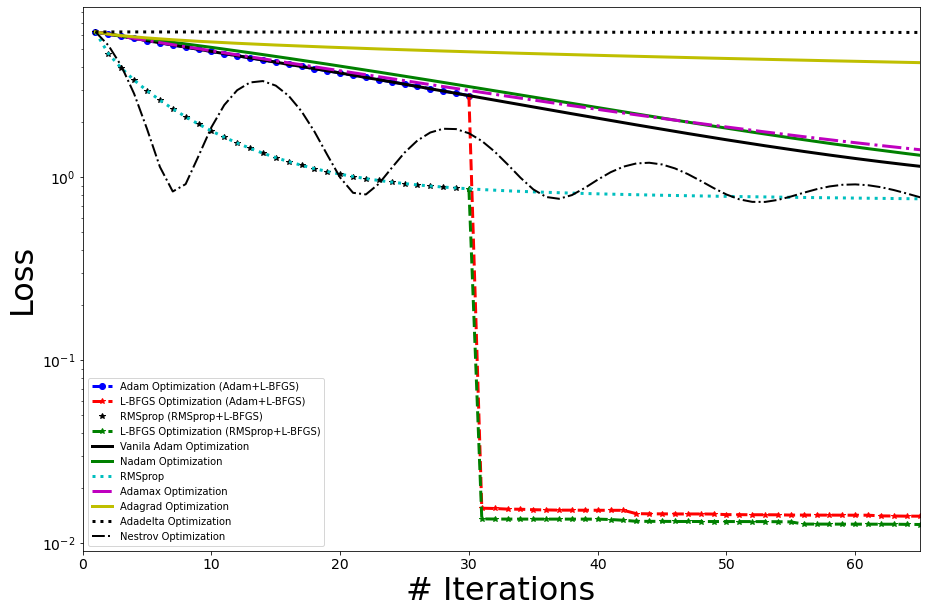

In [19]:
import matplotlib.pyplot as plt

ep_adam = np.arange(30)+1
ep_lbfgs = np.arange(30, 81)

ep_RMSprop = np.arange(30)+1
ep_lbfgs2 = np.arange(30, 81)


np.shape(ep_lbfgs)
np.shape(lb)

fig, ax = plt.subplots(figsize=(15,10))

ax.set_xlabel('# Iterations', fontsize=32)
ax.set_ylabel('Loss', fontsize=32)
ax.set_xlim(0, 65)
#ax.set_ylim(0.1, 10^-5)
ax.semilogy(ep_adam, la, 'bo--', lw=3, label="Adam Optimization (Adam+L-BFGS)")
ax.semilogy(ep_lbfgs, lb, 'r*--', lw=3, label="L-BFGS Optimization (Adam+L-BFGS)")

ax.semilogy(ep_RMSprop, la2, 'k*', lw=4, label="RMSprop (RMSprop+L-BFGS)")
ax.semilogy(ep_lbfgs2, lb2, 'g*--', lw=3, label="L-BFGS Optimization (RMSprop+L-BFGS)")

ep_adam_only = np.arange(500)+1
ax.semilogy(ep_adam_only, la_only, 'k-', lw=3, label="Vanila Adam Optimization")
ep_nadam = np.arange(500)+1
ax.semilogy(ep_nadam, nadam_plt, 'g-', lw=3, label="Nadam Optimization")
ep_RMS = np.arange(500)+1
ax.semilogy(ep_RMS, RMS_plt, 'c:', lw=3, label="RMSprop")
ep_adamax = np.arange(500)+1
ax.semilogy(ep_adamax, adamax_plt, 'm-.', lw=3, label="Adamax Optimization")
ep_adagrad = np.arange(500)+1
ax.semilogy(ep_adagrad, adagrad_plt, 'y-', lw=3, label="Adagrad Optimization")
ep_adadelta = np.arange(500)+1
ax.semilogy(ep_adadelta, adadelta_plt, 'k:', lw=3, label="Adadelta Optimization")
ep_nestrov = np.arange(500)+1
ax.semilogy(ep_nestrov, nestrov_plt, 'k-.', lw=2, label="Nestrov Optimization")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend()

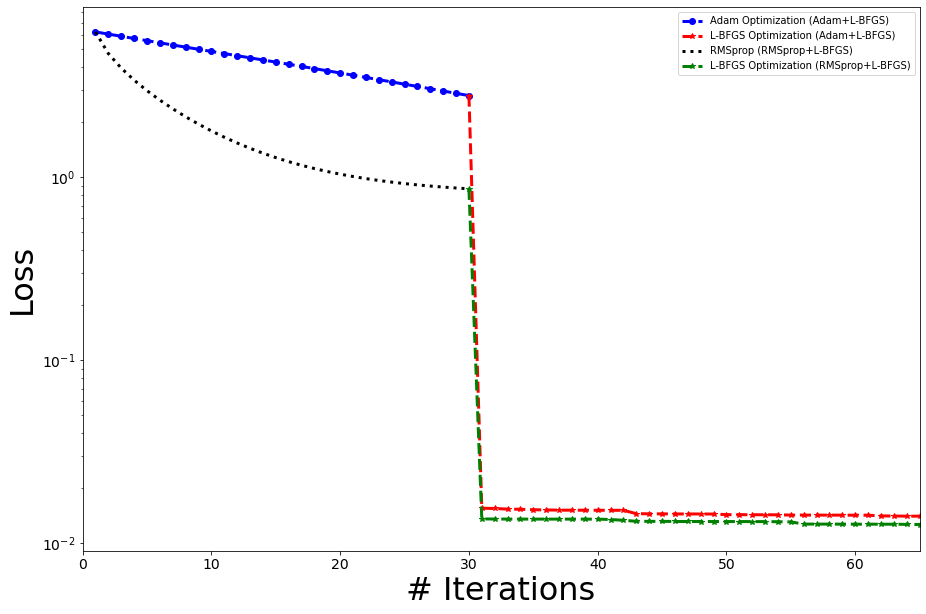

In [20]:
import matplotlib.pyplot as plt

ep_adam = np.arange(30)+1
ep_lbfgs = np.arange(30, 81)

ep_RMSprop = np.arange(30)+1
ep_lbfgs2 = np.arange(30, 81)


fig, ax = plt.subplots(figsize=(15,10))

ax.set_xlabel('# Iterations', fontsize=32)
ax.set_ylabel('Loss', fontsize=32)
ax.set_xlim(0, 65)
#ax.set_ylim(0.1, 10^-5)
ax.semilogy(ep_adam, la, 'bo--', lw=3, label="Adam Optimization (Adam+L-BFGS)")
ax.semilogy(ep_lbfgs, lb, 'r*--', lw=3, label="L-BFGS Optimization (Adam+L-BFGS)")

ax.semilogy(ep_RMSprop, la2, 'k:', lw=3, label="RMSprop (RMSprop+L-BFGS)")
ax.semilogy(ep_lbfgs2, lb2, 'g*--', lw=3, label="L-BFGS Optimization (RMSprop+L-BFGS)")
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend()